<a href="https://colab.research.google.com/github/JULIANNEBBORGES/TELECOM_X_BR_P2/blob/main/TelecomX_%7C_Previs%C3%A3o_Evas%C3%A3o_Clientes_(Churn)_P2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Desafio Telecom X | Previsão de Evasão de Clientes (Churn) - Parte 2





>Objetivo:

>> Construir um pipeline robusto para prever quais clientes da Telecom X têm maior chance de cancelar seus serviços (churn), abrangendo desde a preparação dos dados até a modelagem preditiva e a interpretação dos resultados.

>> O DataFrame `df_cleaned` representa o conjunto de dados após as etapas iniciais de limpeza, estruturação e tratamento de valores ausentes e inconsistentes. Etapas etas realizadas no *Challenge Telecom X: Parte 1.*Portanto, o dataframe encontra-se apto para as próximas fases do pipeline de Machine Learning, como Análise Exploratória de Dados aprofundada, Engenharia de Features, Codificação e Modelagem.

### ============================================



## 📚 1. Preparaçao do ambiente e Importação de Bibliotecas:

> Objetivo:

>> Configurar o ambiente de trabalho e carregar todas as bibliotecas *Python* necessárias para manipulação de dados, visualização, pré-processamento e construção de modelos de Machine Learning.

In [2]:
# Importando as bibliotecas essenciais para manipulação de dados e análise
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import gc
import random
import pprint

# Bibliotecas para ignorar avisos (warnings)
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para estatística
from collections import Counter
from scipy import stats
from scipy.stats import chi2_contingency

# Bibliotecas Plotly para visualização interativa
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

# Bibliotecas Scikit-learn para pré-processamento, seleção de features e modelagem
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Biblioteca para balanceamento de classes (SMOTE)
from imblearn.over_sampling import SMOTE

# Biblioteca para análise de multicolinearidade (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

import time

### ============================================

## 📚 2. Extração e Análise Preliminar do Dataset:

> Objetivo:

>> Carregar o dataset df_cleaned.csv em um DataFrame do Pandas e realizar uma primeira inspeção para compreender sua estrutura, identificar tipos de dados e verificar a presença de valores ausentes.


In [3]:
# Carregar o DataFrame 'df_cleaned' a partir do arquivo CSV
try:
    df = pd.read_csv('/content/df_cleaned.csv')
    print("✅ DataFrame 'df_cleaned' carregado com sucesso do CSV.")
    print("-------------------------------------------------------")

    print("\n➡️ Primeiras 5 linhas do 'df_cleaned':")
    print("-------------------------------------------------------")
    display(df.head())

    print("\n------------------------------------------")
    print("\n ➡️ Informações Gerais do 'df_cleaned':")
    print("------------------------------------------")
    df.info()

except FileNotFoundError:
    print("🚫 Erro: O arquivo '/content/df_cleaned.csv' não foi encontrado. Por favor, verifique se o arquivo foi carregado corretamente.")
except Exception as e:
    print(f"🚫 Ocorreu um erro ao carregar o arquivo '/content/df_cleaned.csv': {e}")

✅ DataFrame 'df_cleaned' carregado com sucesso do CSV.
-------------------------------------------------------

➡️ Primeiras 5 linhas do 'df_cleaned':
-------------------------------------------------------


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40



------------------------------------------

 ➡️ Informações Gerais do 'df_cleaned':
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 

> O DataFrame df_cleaned foi carregado com sucesso. <br>

> As primeiras linhas (df.head()) fornecem uma amostra visual do dataset, mostrando colunas como customerID, Churn, informações sobre o cliente (customer.gender, customer.SeniorCitizen, etc.), serviços de telefone e internet, e dados da conta (account.Contract, account.Charges.Monthly, Total.Day).

> A função df.info() é crucial.
>> Informa o número de entradas (7043) e colunas (22).
>> Identifica que a maioria das colunas é do tipo object (strings/categóricas), com algumas int64 e float64 (numéricas).
>> E revela valores não nulos:
>> Total.Day: 7032 valores não nulos (faltam 11)
>> account.Charges.Total: 7032 valores não nulos (faltam 11)
>> Confirmando a presença de dados ausentes em duas colunas numéricas, as quais precisaram ser tratadas.

### ============================================

## 📚 3. Tratamento (estruturação) do processo de ETL:

In [4]:
# --- Remoção da coluna customerID ---
# Objetivo: Remover identificadores únicos que não agregam valor preditivo e podem causar overfitting.
# Breve explicação: A coluna 'customerID' é um identificador único de cliente. Ela não contém informações
#                   que um modelo de Machine Learning possa generalizar para fazer previsões em novos dados,
#                   podendo inclusive levar a um fenômeno de "memorização" (overfitting).
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
    print("\n✅ Coluna 'customerID' removida do df.")
else:
    print("\n⚠️ Coluna 'customerID' não encontrada no df para remoção.")

print("\n➡️ df após remoção do ID (primeiras 5 linhas):")
display(df.head())
print("\n➡️ Nomes das colunas no DataFrame df após remoção do ID:")
print(df.columns.tolist())

# --- Agrupamento de Categorias "No" e "No internet service" ---
# Objetivo: Reduzir a dimensionalidade e simplificar a representação de variáveis de serviço,
#           agrupando 'No internet service' com 'No' para representar a ausência do serviço.
# Breve explicação: Muitas colunas de serviço (e.g., OnlineSecurity) possuem 'No' e 'No internet service'.
#                   Ambas significam que o cliente não possui aquele serviço. Agrupá-las reduz a
#                   multicolinearidade e simplifica o pré-processamento, mantendo a informação
#                   se o cliente tem internet ou não na coluna 'internet.InternetService'.
service_cols_to_group = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'phone.MultipleLines'
]

print("\n➡️ Realizando agrupamento das categorias 'No' e 'No internet service' nas colunas de serviço...")
for col in service_cols_to_group:
    if col in df.columns:
        df[col] = df[col].replace('No internet service', 'No')
        print(f" - Agrupamento aplicado na coluna '{col}'.")
    else:
        print(f" ⚠️ Coluna '{col}' não encontrada no DataFrame. Pulando agrupamento.")
print("\n✅ Agrupamento de categorias concluído.")

# Verificação da distribuição de valores em algumas colunas para confirmar o agrupamento
print("\n➡️ Verificando distribuição de valores em 'internet.OnlineSecurity' após agrupamento:")
display(df['internet.OnlineSecurity'].value_counts())
print("\n➡️ Verificando distribuição de valores em 'phone.MultipleLines' após agrupamento:")
display(df['phone.MultipleLines'].value_counts())

# --- Verificação e Correção de Tipos de Dados e Tratamento de NaNs em Colunas Numéricas ---
# Objetivo: Garantir que colunas numéricas estejam no formato correto e tratar valores ausentes (NaNs).
# Breve explicação: As colunas 'Total.Day' e 'account.Charges.Total' foram identificadas com NaNs.
#                   Além disso, o tipo de dado pode ser inconsistente. Iremos converter para numérico
#                   e preencher os NaNs com a média, uma estratégia comum para dados numéricos.
print("\n➡️ Resumo da Verificação e Conversão de 'account.Charges.Total':")
# Usando errors='coerce' fará com que valores não numéricos sejam transformados em NaN
df['account.Charges.Total_numeric'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar quantos valores não puderam ser convertidos
num_non_numeric = df['account.Charges.Total_numeric'].isnull().sum() - df['account.Charges.Total'].isnull().sum()

# Descartar a coluna 'account.Charges.Total' original e renomear a nova coluna numérica
df = df.drop('account.Charges.Total', axis=1)
df = df.rename(columns={'account.Charges.Total_numeric': 'account.Charges.Total'})

# Preencher os valores nulos com a média da coluna 'account.Charges.Total'
# É importante preencher APENAS os NaNs resultantes da conversão, ou os que já estavam presentes.
# A média é uma boa escolha quando a distribuição não é muito enviesada e a quantidade de NaNs é pequena.
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(df['account.Charges.Total'].mean())
df['Total.Day'] = df['Total.Day'].fillna(df['Total.Day'].mean()) # Preenche NaNs em Total.Day também

resumo_charges_total = pd.DataFrame({
    'Coluna': ['account.Charges.Total', 'Total.Day'],
    'Valores não numéricos encontrados': [num_non_numeric, 0], # Total.Day já era numérica, então 0
    'Tipo de dado após conversão e preenchimento': [str(df['account.Charges.Total'].dtype), str(df['Total.Day'].dtype)]
})
display(resumo_charges_total)
print("\n➡️ Primeiros valores das colunas 'Total.Day' e 'account.Charges.Total' após tratamento:")
display(df[['Total.Day', 'account.Charges.Total']].head())

# --- Tratamento de espaços em branco em colunas de texto ---
# Objetivo: Remover espaços em branco no início e fim de strings em colunas de tipo 'object'.
# Breve explicação: Espaços em branco podem criar categorias duplicadas (e.g., 'Yes ' vs 'Yes')
#                   e causar problemas em codificações futuras.
print("\n📚 Tratando espaços em branco em colunas de texto.")
for coluna in df.select_dtypes(include='object').columns:
    try:
        df[coluna] = df[coluna].str.strip()
        print(f"Espaços em branco removidos na coluna '{coluna}'.")
    except Exception as e:
        print(f"Não foi possível aplicar strip na coluna '{coluna}': {e}")
print("\n📚 Verificação após tratamento de espaços em branco:")
for coluna in df.select_dtypes(include='object').columns:
    coluna_str = df[coluna].astype(str)
    # Verifica espaços em branco no início/fim usando regex
    espacos_branco = coluna_str.str.contains(r'^\s|\s$', na=False).sum()
    print(f"Coluna '{coluna}': Espaços em branco no início/fim restantes: {espacos_branco}")

# --- Tratamento de Valores Vazios na Variável Alvo ('Churn') ---
# Objetivo: Remover quaisquer linhas onde a variável alvo 'Churn' possa conter valores vazios ou inesperados.
# Breve explicação: A variável 'Churn' deve ser binária ('Yes' ou 'No'). Valores vazios ou inconsistentes
#                   nela impossibilitam o treinamento do modelo.
print("\n➡️ Verificando e tratando linhas com valor vazio em 'Churn'...")
linhas_vazias_churn = df[df['Churn'] == ' ']

if not linhas_vazias_churn.empty:
    df = df[df['Churn'] != ' '].copy()
    print(f"✅ {len(linhas_vazias_churn)} linhas com valor vazio em 'Churn' removidas.")
else:
    print("⚠️ Nenhuma linha com valor vazio em 'Churn' encontrada.")

print("\n➡️ Nova distribuição da variável alvo 'Churn':")
print(df['Churn'].value_counts())
print("\n➡️ Novo shape do DataFrame df após remoção de linhas vazias em 'Churn':")
print(df.shape)


✅ Coluna 'customerID' removida do df.

➡️ df após remoção do ID (primeiras 5 linhas):


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40



➡️ Nomes das colunas no DataFrame df após remoção do ID:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']

➡️ Realizando agrupamento das categorias 'No' e 'No internet service' nas colunas de serviço...
 - Agrupamento aplicado na coluna 'internet.OnlineSecurity'.
 - Agrupamento aplicado na coluna 'internet.OnlineBackup'.
 - Agrupamento aplicado na coluna 'internet.DeviceProtection'.
 - Agrupamento aplicado na coluna 'internet.TechSupport'.
 - Agrupamento aplicado na coluna 'internet.StreamingTV'.
 - Agrupamento aplicado na coluna 'internet.StreamingMovies'.

,count
internet.OnlineSecurity,
No,5024
Yes,2019



➡️ Verificando distribuição de valores em 'phone.MultipleLines' após agrupamento:


,count
phone.MultipleLines,
No,3390
Yes,2971
No phone service,682



➡️ Resumo da Verificação e Conversão de 'account.Charges.Total':


,Coluna,Valores não numéricos encontrados,Tipo de dado após conversão e preenchimento
0,account.Charges.Total,0,float64
1,Total.Day,0,float64



➡️ Primeiros valores das colunas 'Total.Day' e 'account.Charges.Total' após tratamento:


,Total.Day,account.Charges.Total
0,2.20,593.30
1,2.01,542.40
2,2.34,280.85
3,3.17,1237.85
4,2.97,267.40



📚 Tratando espaços em branco em colunas de texto.
Espaços em branco removidos na coluna 'Churn'.
Espaços em branco removidos na coluna 'customer.gender'.
Espaços em branco removidos na coluna 'customer.Partner'.
Espaços em branco removidos na coluna 'customer.Dependents'.
Espaços em branco removidos na coluna 'phone.PhoneService'.
Espaços em branco removidos na coluna 'phone.MultipleLines'.
Espaços em branco removidos na coluna 'internet.InternetService'.
Espaços em branco removidos na coluna 'internet.OnlineSecurity'.
Espaços em branco removidos na coluna 'internet.OnlineBackup'.
Espaços em branco removidos na coluna 'internet.DeviceProtection'.
Espaços em branco removidos na coluna 'internet.TechSupport'.
Espaços em branco removidos na coluna 'internet.StreamingTV'.
Espaços em branco removidos na coluna 'internet.StreamingMovies'.
Espaços em branco removidos na coluna 'account.Contract'.
Espaços em branco removidos na coluna 'account.PaperlessBilling'.
Espaços em branco removidos na

> Considerações:

> As etapas iniciais de tratamento de dados foram concluídas com sucesso.

>> Remoção de customerID: <br>
>> A coluna customerID foi removida, conforme esperado, pois não possui valor preditivo para o modelo.

>> Agrupamento de Categorias: <br>
>> As categorias "No internet service" foram substituídas por "No" em diversas colunas de serviço, como internet.OnlineSecurity e phone.MultipleLines. Isso padroniza a informação de ausência de serviço, reduzindo a complexidade sem perder a informação sobre a conexão geral à internet (que está na coluna internet.InternetService). As verificações (value_counts()) confirmam a aplicação do agrupamento.<br>

>> Tratamento de NaNs e Tipos de Dados: <br>
>> As colunas Total.Day e account.Charges.Total foram convertidas para o tipo float64 e seus 11 valores nulos foram preenchidos com a média da respectiva coluna. Isso garante que esses campos estejam prontos para cálculos numéricos e que não haja dados faltantes.

>> Tratamento de Espaços em Branco: <br>
>> Espaços em branco no início ou fim de valores em colunas de texto (tipo object) foram removidos, prevenindo inconsistências em futuras operações de codificação ou análise. A verificação final mostra que não há espaços em branco remanescentes.

>> Tratamento de Valores Vazios em 'Churn': <br>
>> Foi verificado se a variável alvo Churn continha strings vazias, mas nenhuma foi encontrada, o que é um bom sinal da qualidade dos dados.
Com essas limpezas, o DataFrame está mais consistente e pronto para as próximas fases de engenharia de features e análise exploratória.

In [5]:
# Verificar os valores únicos na coluna 'customer.gender' do DataFrame df_cleaned
print("➡️ Valores únicos na coluna 'customer.gender':")
print(df['customer.gender'].value_counts())

➡️ Valores únicos na coluna 'customer.gender':
customer.gender
Male      3555
Female    3488
Name: count, dtype: int64


### ============================================

## 📚 4. Engenharia de Features


> Objetivo:
>>Criar novas variáveis a partir das features existentes para enriquecer o dataset com informações que podem ser mais relevantes para a previsão de churn.


In [6]:
# --- Criar 'HasMultipleServices' ---
# Objetivo: Indicar se um cliente possui múltiplos serviços de internet ou telefone ativos.
# Breve explicação: A posse de múltiplos serviços pode ser um indicador de engajamento ou dependência.
#                   Clientes com muitos serviços podem ser mais difíceis de churnar, ou, inversamente,
#                   mais propensos a churnar se houver falha em algum deles.
service_cols = ['phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

existing_service_cols = [col for col in service_cols if col in df.columns]

if existing_service_cols:
    # Contar o número de serviços ativos (onde o valor indica serviço ativo)
    # 'Yes' é ativo para a maioria, 'DSL' ou 'Fiber optic' para InternetService
    active_service_values = ['Yes', 'DSL', 'Fiber optic']
    df['NumActiveServices'] = df[existing_service_cols].apply(
        lambda row: sum(1 for col in existing_service_cols if row[col] in active_service_values),
        axis=1
    )
    df['HasMultipleServices'] = df['NumActiveServices'] > 1
    print("✅ Coluna 'HasMultipleServices' criada com sucesso.")
else:
    print("⚠️ Aviso: Nenhuma coluna de serviço encontrada em df para criar 'HasMultipleServices'.")

# --- Criar 'HasPremiumSecurity' ---
# Objetivo: Indicar se o cliente possui serviços de segurança premium (OnlineSecurity e TechSupport).
# Breve explicação: Clientes que investem em segurança e suporte técnico podem ter uma percepção
#                   de valor maior e, portanto, ser mais leais.
premium_security_cols = ['internet.OnlineSecurity', 'internet.TechSupport']
existing_premium_security_cols = [col for col in premium_security_cols if col in df.columns]

if len(existing_premium_security_cols) == 2:
    df['HasPremiumSecurity'] = (df['internet.OnlineSecurity'] == 'Yes') & \
                               (df['internet.TechSupport'] == 'Yes')
    print("✅ Coluna 'HasPremiumSecurity' criada com sucesso.")
elif existing_premium_security_cols:
    print(f"⚠️ Aviso: Apenas algumas colunas de segurança premium ({existing_premium_security_cols}) encontradas.")
else:
    print("⚠️ Aviso: Nenhuma coluna de segurança premium ('internet.OnlineSecurity', 'internet.TechSupport') encontrada.")

# --- Criar 'HasStreaming' ---
# Objetivo: Indicar se o cliente utiliza serviços de streaming (TV ou Filmes).
# Breve explicação: O uso de streaming pode indicar um maior consumo de banda e uma
#                   dependência dos serviços de internet, o que pode influenciar o churn.
streaming_cols = ['internet.StreamingTV', 'internet.StreamingMovies']
existing_streaming_cols = [col for col in streaming_cols if col in df.columns]

if existing_streaming_cols:
    df['HasStreaming'] = (df[existing_streaming_cols] == 'Yes').any(axis=1)
    print("✅ Coluna 'HasStreaming' criada com sucesso.")
else:
    print("⚠️ Aviso: Nenhuma coluna de streaming ('internet.StreamingTV', 'internet.StreamingMovies') encontrada.")

# --- Criar 'TotalExtraServices' ---
# Objetivo: Contar o total de serviços extras que um cliente possui.
# Breve explicação: Uma contagem total pode ser mais informativa do que a presença
#                   individual de cada serviço extra, indicando um nível geral de engajamento.
extra_service_cols = ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                      'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']
existing_extra_service_cols = [col for col in extra_service_cols if col in df.columns]

if existing_extra_service_cols:
    df['TotalExtraServices'] = (df[existing_extra_service_cols] == 'Yes').sum(axis=1)
    print("✅ Coluna 'TotalExtraServices' criada com sucesso.")
else:
    print("⚠️ Aviso: Nenhuma coluna de serviço extra ('internet.OnlineSecurity', etc.) encontrada.")

# Remover a coluna intermediária 'NumActiveServices'
if 'NumActiveServices' in df.columns:
    df = df.drop(columns=['NumActiveServices'])

print("\n➡️ Primeiras linhas do DataFrame com as novas features de feature engineering:")
display(df.head())

✅ Coluna 'HasMultipleServices' criada com sucesso.
✅ Coluna 'HasPremiumSecurity' criada com sucesso.
✅ Coluna 'HasStreaming' criada com sucesso.
✅ Coluna 'TotalExtraServices' criada com sucesso.

➡️ Primeiras linhas do DataFrame com as novas features de feature engineering:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total,HasMultipleServices,HasPremiumSecurity,HasStreaming,TotalExtraServices
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,One year,Yes,Mailed check,2.20,65.6,593.30,True,False,True,3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,Month-to-month,No,Mailed check,2.01,59.9,542.40,True,False,True,1
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,2.34,73.9,280.85,True,False,False,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85,True,False,True,4
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Mailed check,2.97,83.9,267.40,True,False,True,2


> As novas features foram criadas e adicionadas ao DataFrame:

>> HasMultipleServices: Uma coluna booleana que indica se o cliente utiliza mais de um serviço (telefone/internet/segurança/streaming).

>> HasPremiumSecurity: Uma coluna booleana que sinaliza se o cliente assina tanto "OnlineSecurity" quanto "TechSupport".

>>HasStreaming: Uma coluna booleana que indica se o cliente utiliza qualquer serviço de streaming (TV ou Filmes).

>> TotalExtraServices: Uma contagem do número total de serviços extras de internet que o cliente possui.

>> Essas novas features transformam informações granuladas em indicadores de engajamento e perfil de uso, que podem ser mais poderosos para o modelo identificar padrões de churn. A coluna intermediária NumActiveServices foi removida, mantendo o DataFrame limpo.

### ============================================

## 📚 5. Análise Exploratória de Dados (EDA)

> Objetivos:<br>

>> Explorar as características do conjunto de dados, identificar padrões e visualizar as relações entre as variáveis, especialmente em relação à variável alvo Churn.


### --- Distribuição da Variável Alvo ('Churn') ---


> Objetivo:
>>  Entender a proporção de clientes que evadiram (Churn = 'Yes') vs. não evadiram (Churn = 'No').

>>  A distribuição da variável alvo é crucial, especialmente em problemas de classificação, pois datasets desbalanceados podem levar a modelos que privilegiam a classe majoritária.

➡️ Distribuição da variável alvo 'Churn':
Churn
No     5174
Yes    1869
Name: count, dtype: int64


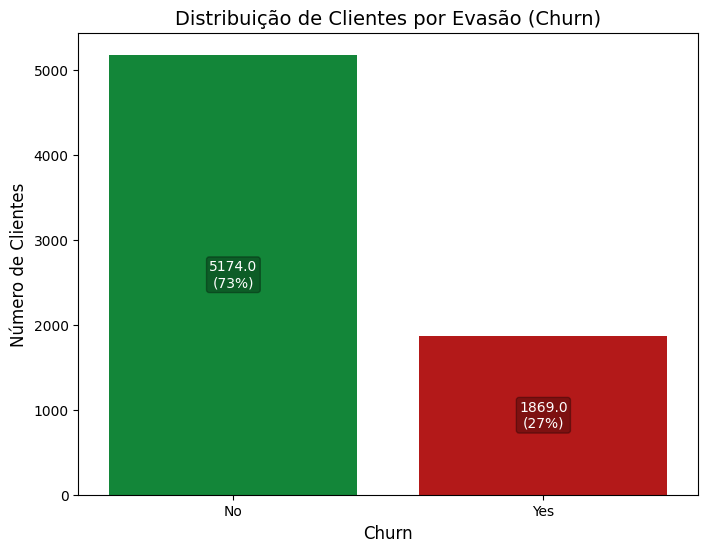


➡️ Proporção de Churn:
Churn
No     73.0
Yes    27.0
Name: proportion, dtype: float64


In [7]:
print("➡️ Distribuição da variável alvo 'Churn':")
churn_counts = df['Churn'].value_counts()
print(churn_counts)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df, palette={'No': '#009933', 'Yes': '#cc0000'})
plt.title('Distribuição de Clientes por Evasão (Churn)', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    annotation_text = f'{height}\n({percentage:.0f}%)'
    ax.annotate(annotation_text, (p.get_x() + p.get_width() / 2., height * 0.5),
                ha='center', va='center', fontsize=10, color='white',
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.3))
plt.show()

churn_proportion = df['Churn'].value_counts(normalize=True) * 100
print("\n➡️ Proporção de Churn:")
print(churn_proportion.round(0))


➡️ Colunas numéricas para análise: ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

➡️ Boxplots das Features Numéricas por Churn:


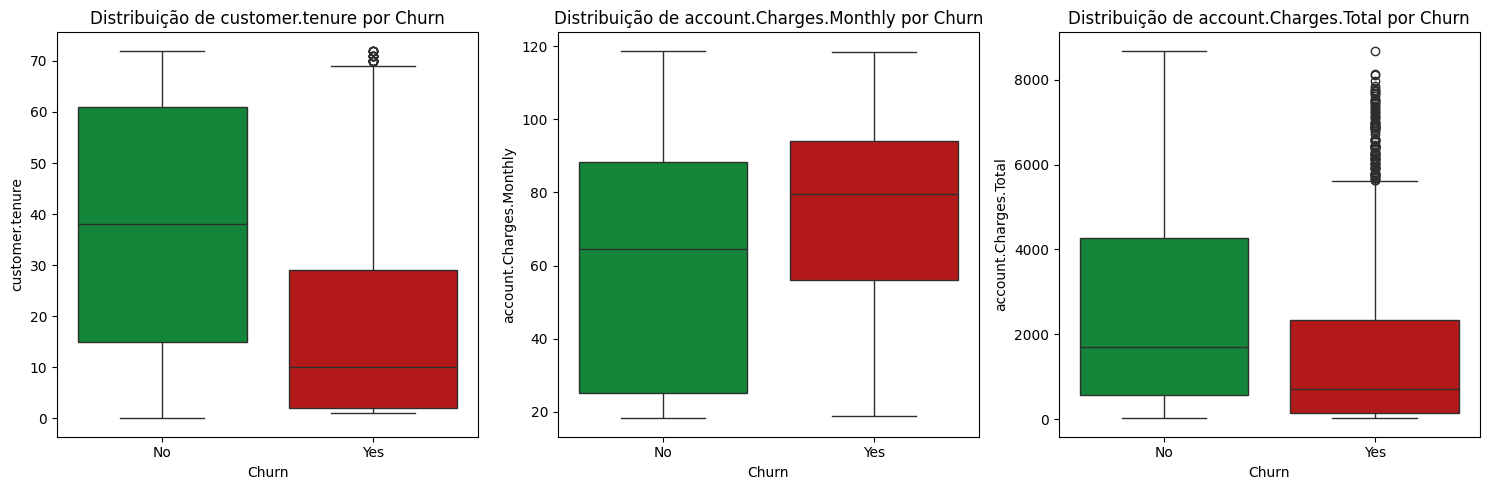

In [8]:
numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
print(f"\n➡️ Colunas numéricas para análise: {numerical_cols}")

# Boxplots para comparar distribuição por Churn
print("\n➡️ Boxplots das Features Numéricas por Churn:")
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(15, n_rows * 5))
churn_palette = {'No': '#009933', 'Yes': '#cc0000'}

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Churn', y=col, data=df, palette=churn_palette, order=['No', 'Yes'])
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


➡️ Histogramas das Features Numéricas:


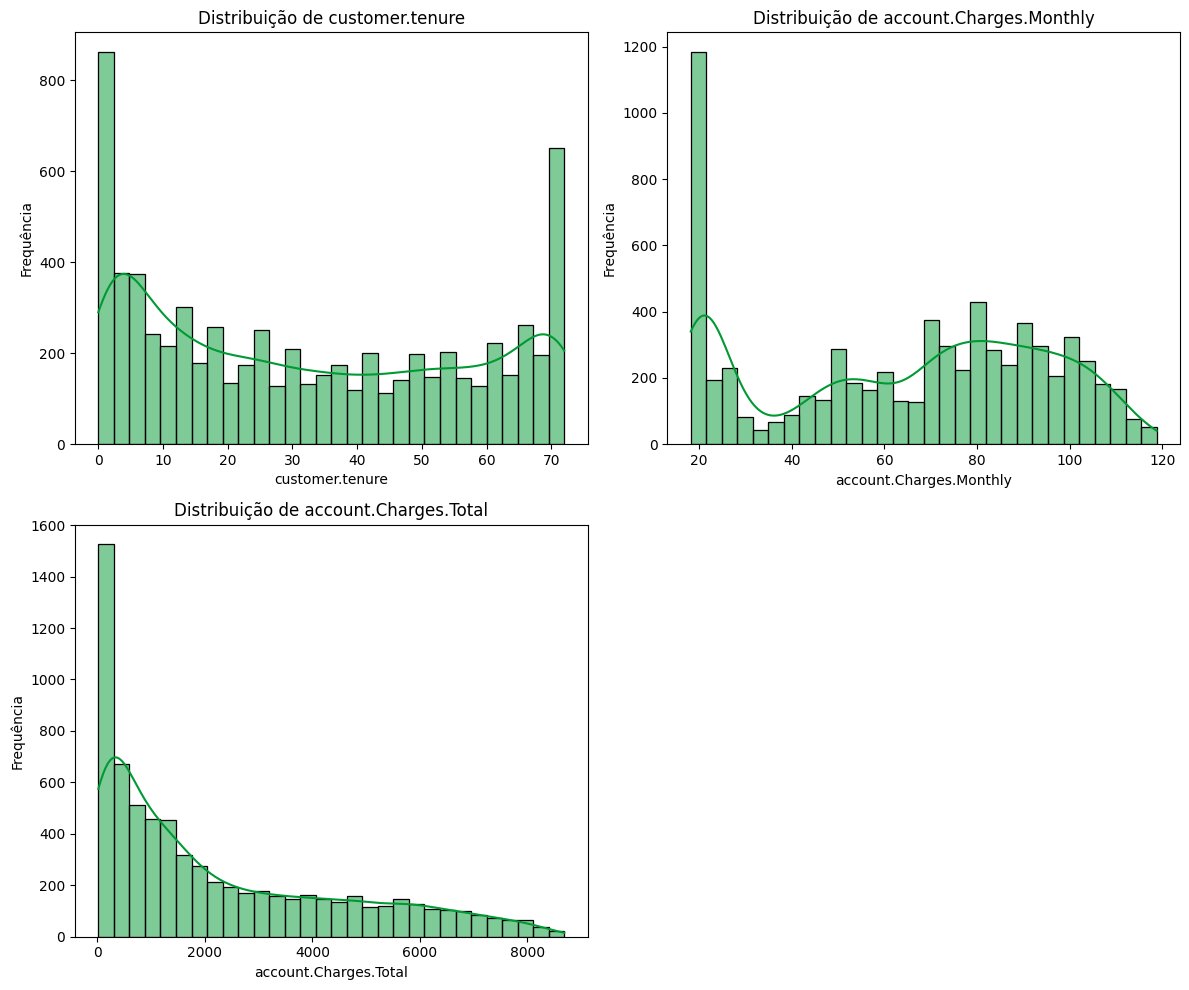

In [9]:
# Histogramas para visualizar a distribuição de frequência
print("\n➡️ Histogramas das Features Numéricas:")
numerical_cols_hist = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
n_cols = 2
n_rows = (len(numerical_cols_hist) + n_cols - 1) // n_cols
plt.figure(figsize=(12, n_rows * 5))

for i, col in enumerate(numerical_cols_hist):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='#009933', bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

> Análise de 'customer.SeniorCitizen' como categórica (countplot)


➡️ Relação entre customer.SeniorCitizen e Churn:


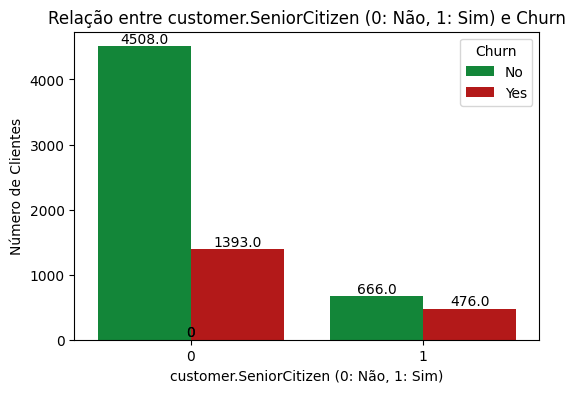

In [10]:
print("\n➡️ Relação entre customer.SeniorCitizen e Churn:")
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='customer.SeniorCitizen', hue='Churn', data=df, palette=churn_palette)
plt.title('Relação entre customer.SeniorCitizen (0: Não, 1: Sim) e Churn')
plt.xlabel('customer.SeniorCitizen (0: Não, 1: Sim)')
plt.ylabel('Número de Clientes')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

### --- **Análise** de Features Categóricas e Novas Features Criadas ---

> Objetivo:

>> Explorar a relação entre as features categóricas (e as novas criadas) e a variável alvo 'Churn'.
>> Gráficos de contagem (countplot) mostram a distribuição de churn dentro de cada categoria, ajudando a identificar quais categorias estão mais ou menos propensas à evasão.


➡️ Análise de Features Categóricas e Novas Features Criadas por Churn:


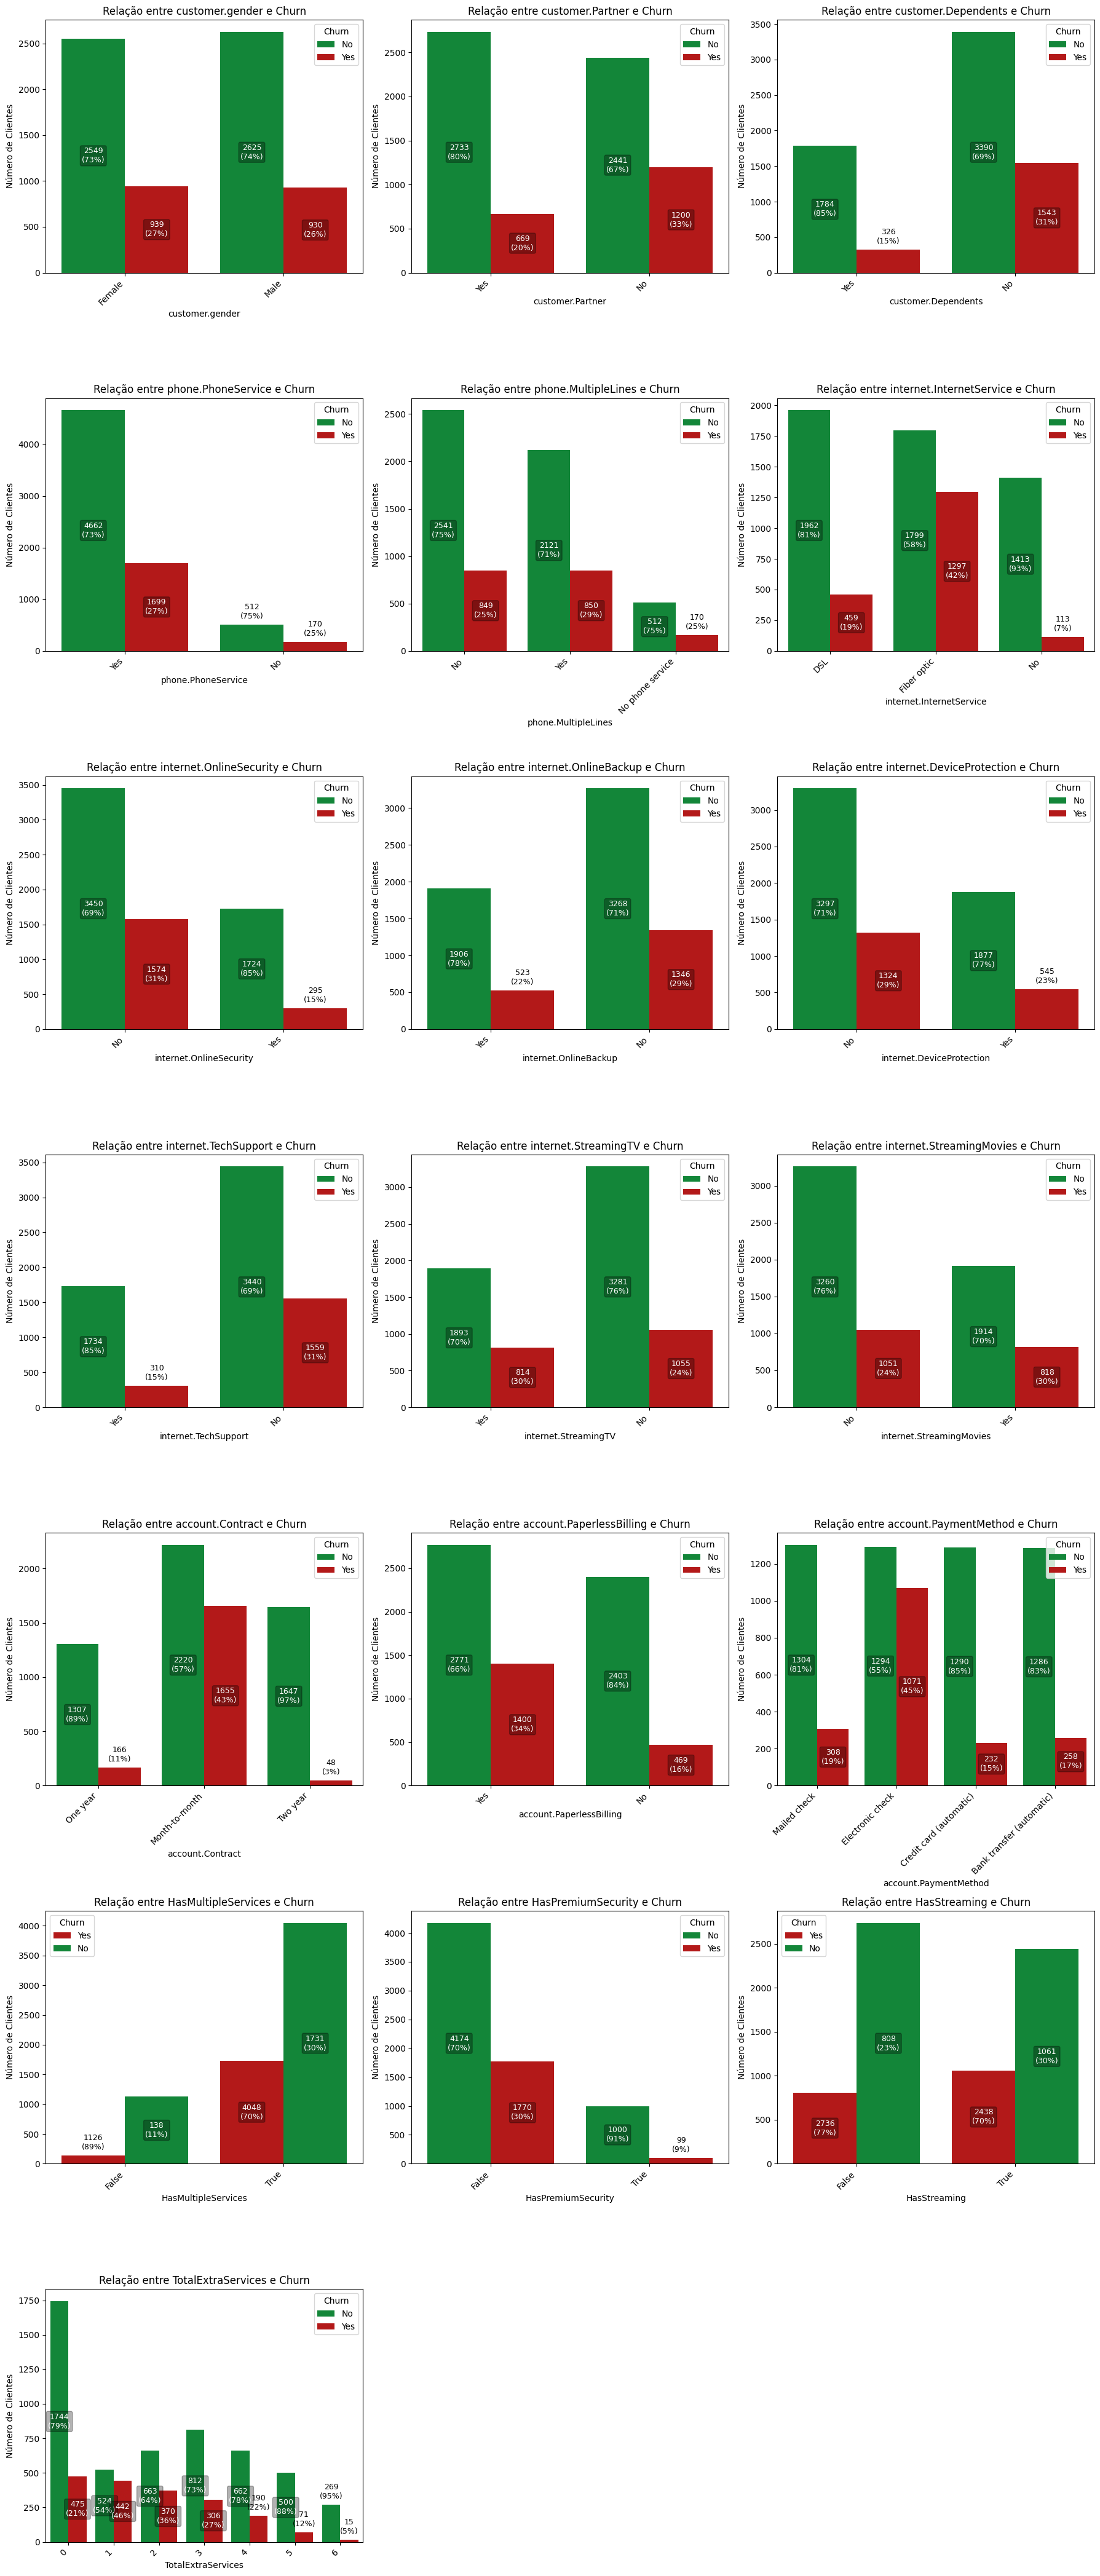

In [11]:
print("\n➡️ Análise de Features Categóricas e Novas Features Criadas por Churn:")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn') # 'Churn' já foi analisada como variável alvo

# Incluir as novas features criadas
new_features_for_eda = ['HasMultipleServices', 'HasPremiumSecurity', 'HasStreaming', 'TotalExtraServices']
for feature in new_features_for_eda:
    if feature not in categorical_cols and feature in df.columns: # Evitar duplicar ou incluir não existentes
        categorical_cols.append(feature)

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(18, n_rows * 6))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    if df[col].dtype == 'bool': # Para features booleanas, usar valores True/False para ordenar
        order = [False, True]
    elif df[col].dtype == 'int64' and col == 'TotalExtraServices': # Para contagem de serviços, pode ser ordenada
        order = sorted(df[col].unique())
    else:
        order = None # Deixar o seaborn decidir a ordem padrão

    ax = sns.countplot(x=col, hue='Churn', data=df, palette=churn_palette, order=order)
    plt.title(f'Relação entre {col} e Churn')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')

    # Adicionar anotações de contagem e porcentagem
    grouped_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    total_in_category = grouped_counts.sum(axis=1)
    # Evitar divisão por zero caso haja alguma categoria sem dados
    total_in_category = total_in_category.replace(0, np.nan)
    grouped_percentages = grouped_counts.divide(total_in_category, axis=0) * 100

    # Obter os nomes das colunas de hue (que são os valores únicos de 'Churn': 'No', 'Yes')
    # Esta é a forma mais robusta de garantir que os labels de hue_category estejam corretos
    hue_categories_from_grouped_counts = grouped_counts.columns.tolist()

    for container_idx, container in enumerate(ax.containers):
        # Mapear o índice do container para a categoria correta do hue ('No' ou 'Yes')
        # Seaborn geralmente plota os containers na ordem das colunas unstacked/ordenadas
        if container_idx < len(hue_categories_from_grouped_counts):
            hue_category = hue_categories_from_grouped_counts[container_idx]
        else:
            # Isso não deve acontecer em um plot padrão, mas é uma segurança
            print(f"⚠️ Aviso: Índice do container {container_idx} excede o número de categorias de hue. Pulando anotação.")
            continue

        for patch in container.patches:
            height = patch.get_height()
            x_center = patch.get_x() + patch.get_width() / 2.

            # Obter o label do tick do eixo X correspondente ao patch
            x_tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
            x_tick_positions = ax.get_xticks()
            closest_label_idx = np.argmin(np.abs(x_tick_positions - x_center))
            category_label_str = x_tick_labels[closest_label_idx]

            # Converter a string do label para o tipo de dado correto antes de usar como chave
            key_for_lookup = None
            if df[col].dtype == 'bool': # Se a coluna original é booleana
                if category_label_str == 'True':
                    key_for_lookup = True
                elif category_label_str == 'False':
                    key_for_lookup = False
                elif category_label_str == '0': # Caso booleano seja representado como '0' ou '1'
                    key_for_lookup = False
                elif category_label_str == '1':
                    key_for_lookup = True
            elif df[col].dtype == 'int64': # Se a coluna original é numérica (como TotalExtraServices)
                try:
                    key_for_lookup = int(category_label_str)
                except ValueError:
                    # Se a conversão para int falhar, assume que é uma string
                    key_for_lookup = category_label_str
            else: # Para todas as outras colunas (que são strings categóricas)
                key_for_lookup = category_label_str

            # Somente processa se a chave de busca for válida e existir no índice de grouped_counts
            if key_for_lookup is not None and key_for_lookup in grouped_counts.index:
                # Garante que hue_category é uma coluna válida em grouped_counts
                if hue_category in grouped_counts.columns:
                    count = grouped_counts.loc[key_for_lookup, hue_category]
                    percentage = grouped_percentages.loc[key_for_lookup, hue_category]

                    annotation_text = f'{int(count)}\n({percentage:.0f}%)'
                    if height > 0: # Apenas anota se a barra tem altura
                        height_threshold = max(ax.get_ylim()) * 0.08
                        if height > height_threshold * 2: # Se a barra for alta o suficiente, coloca o texto dentro
                            ax.annotate(annotation_text, (x_center, height / 2.),
                                        ha='center', va='center', fontsize=9, color='white',
                                        bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.3))
                        else: # Caso contrário, coloca acima da barra
                            ax.annotate(annotation_text, (x_center, height),
                                        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                                        fontsize=9, color='black') # Cor preta para visibilidade fora da barra
plt.tight_layout()
plt.show()

### --- Análise de Interações entre Features (Exemplo) ---

> Objetivo:

>> Investigar como a combinação de pares de features pode influenciar o Churn.

>> A interação entre duas variáveis pode revelar insights que não seriam            percebidos ao analisar as variáveis individualmente.



➡️ Explorando interações entre features (Exemplos):

Explorando interação entre 'account.Contract' e 'account.Charges.Monthly' em relação a Churn:


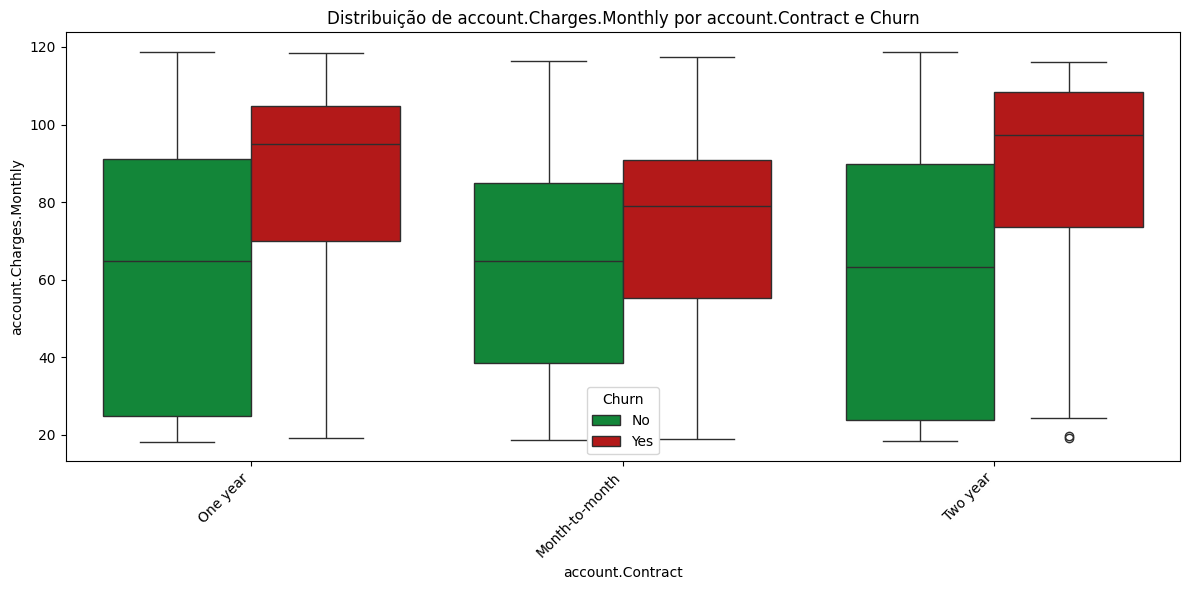


Explorando interação entre 'internet.InternetService' e 'customer.tenure' em relação a Churn:


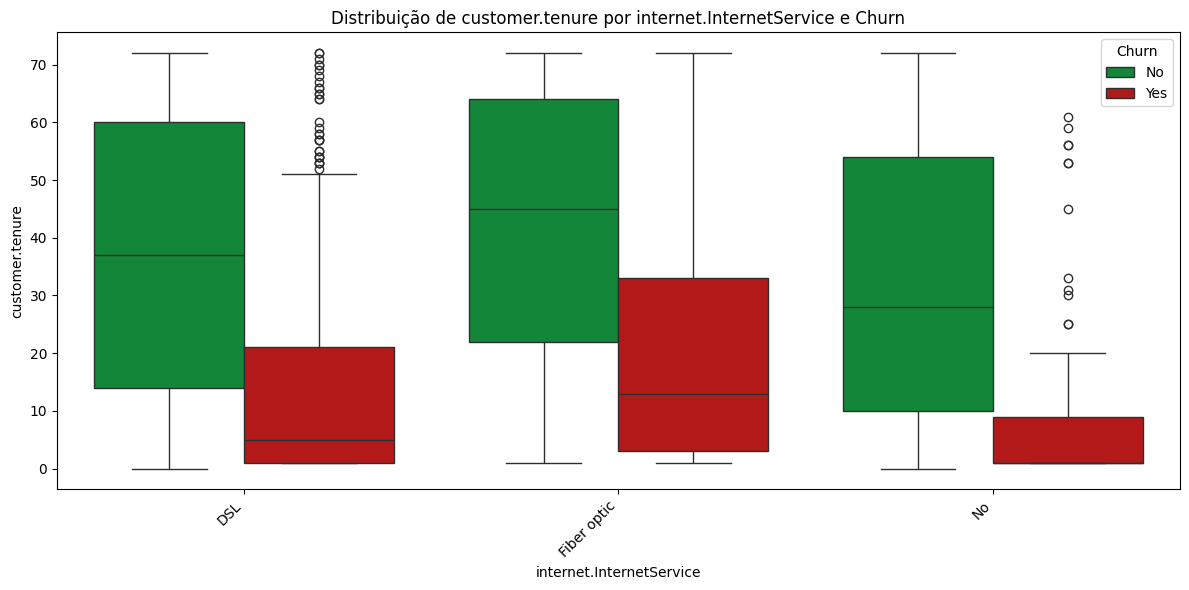


Explorando interação entre 'account.PaymentMethod' e 'customer.tenure' em relação a Churn:


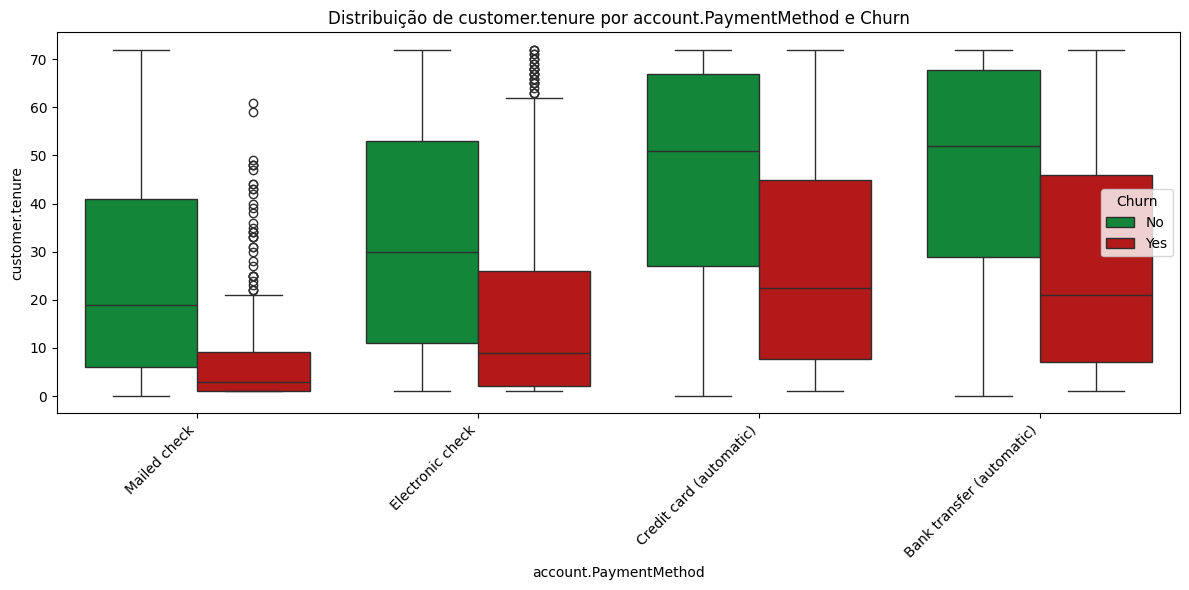


Explorando interação entre 'customer.SeniorCitizen' e 'internet.InternetService' em relação a Churn:
Contagens por combinação e Churn:


Churn                                              No  Yes
customer.SeniorCitizen internet.InternetService           
0                      DSL                       1781  381
                       Fiber optic               1361  904
                       No                        1366  108
1                      DSL                        181   78
                       Fiber optic                438  393
                       No                          47    5

Proporção de Churn (%) por combinação:


Churn                                                   No        Yes
customer.SeniorCitizen internet.InternetService                      
0                      DSL                       82.377428  17.622572
                       Fiber optic               60.088300  39.911700
                       No                        92.672999   7.327001
1                      DSL                       69.884170  30.115830
                       Fiber optic               52.707581  47.292419
                       No                        90.384615   9.615385

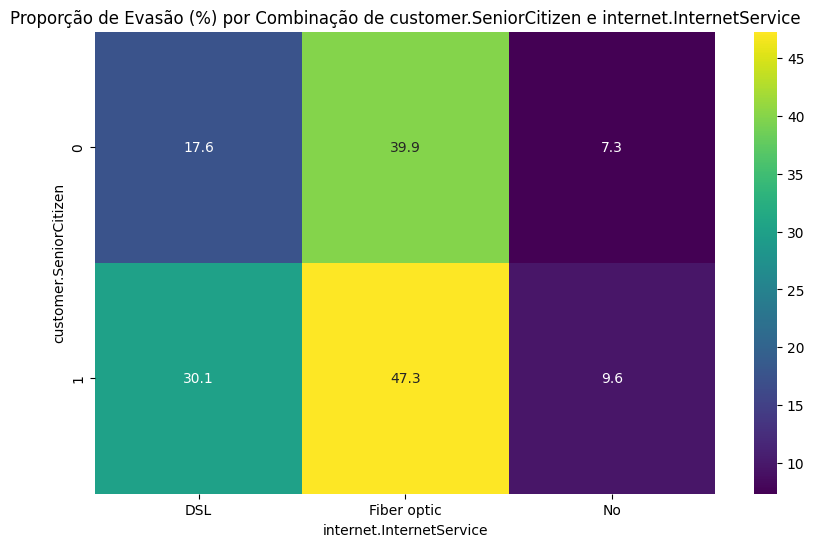

In [12]:
print("\n➡️ Explorando interações entre features (Exemplos):")
interaction_pairs = [
    ('account.Contract', 'account.Charges.Monthly'),
    ('internet.InternetService', 'customer.tenure'),
    ('account.PaymentMethod', 'customer.tenure'),
    ('customer.SeniorCitizen', 'internet.InternetService')
]

for feature1, feature2 in interaction_pairs:
    if feature1 in df.columns and feature2 in df.columns:
        print(f"\nExplorando interação entre '{feature1}' e '{feature2}' em relação a Churn:")

        # Boxplots agrupados para Categórica vs Numérica
        if df[feature1].dtype == 'object' or df[feature1].dtype == 'bool' or (df[feature1].dtype == 'int64' and df[feature1].nunique() < 10):
            if pd.api.types.is_numeric_dtype(df[feature2]):
                plt.figure(figsize=(12, 6))
                sns.boxplot(x=feature1, y=feature2, hue='Churn', data=df, palette=churn_palette)
                plt.title(f'Distribuição de {feature2} por {feature1} e Churn')
                plt.xlabel(feature1)
                plt.ylabel(feature2)
                plt.xticks(rotation=45, ha='right')
                plt.legend(title='Churn')
                plt.tight_layout()
                plt.show()
            elif df[feature2].dtype == 'object' or df[feature2].dtype == 'bool' or (df[feature2].dtype == 'int64' and df[feature2].nunique() < 10):
                 # Heatmap de contagens ou proporções para duas categóricas
                interaction_counts = df.groupby([feature1, feature2, 'Churn']).size().unstack(fill_value=0)
                print("Contagens por combinação e Churn:")
                display(interaction_counts)

                interaction_prop = interaction_counts.apply(lambda x: x / x.sum(), axis=1) * 100
                print("Proporção de Churn (%) por combinação:")
                display(interaction_prop)

                if 'Yes' in interaction_prop.columns:
                    plt.figure(figsize=(10, 6))
                    sns.heatmap(interaction_prop['Yes'].unstack(), annot=True, fmt='.1f', cmap='viridis')
                    plt.title(f'Proporção de Evasão (%) por Combinação de {feature1} e {feature2}')
                    plt.xlabel(feature2)
                    plt.ylabel(feature1)
                    plt.show()
            else:
                print(f" Não é possível plotar interação para os tipos de dados de '{feature1}' e '{feature2}'.")
        elif pd.api.types.is_numeric_dtype(df[feature1]) and (df[feature2].dtype == 'object' or df[feature2].dtype == 'bool' or (df[feature2].dtype == 'int64' and df[feature2].nunique() < 10)):
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=feature2, y=feature1, hue='Churn', data=df, palette=churn_palette)
            plt.title(f'Distribuição de {feature1} por {feature2} e Churn')
            plt.xlabel(feature2)
            plt.ylabel(feature1)
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='Churn')
            plt.tight_layout()
            plt.show()
        else:
            print(f" Não é possível plotar interação para os tipos de dados de '{feature1}' e '{feature2}'.")
    else:
        print(f" Uma ou ambas as colunas ('{feature1}', '{feature2}') não encontradas no DataFrame.")

### --- Distribuição de Features Numéricas por Status de Churn (Histogramas Sobrepostos) ---


> Objetivo:

>> Comparar as distribuições de features numéricas para clientes com e sem churn.

>> Histogramas sobrepostos permitem uma visualização clara de como os valores de uma feature numérica se diferenciam entre as duas classes da variável alvo.


➡️ Gerando histogramas sobrepostos para features numéricas por status de evasão:


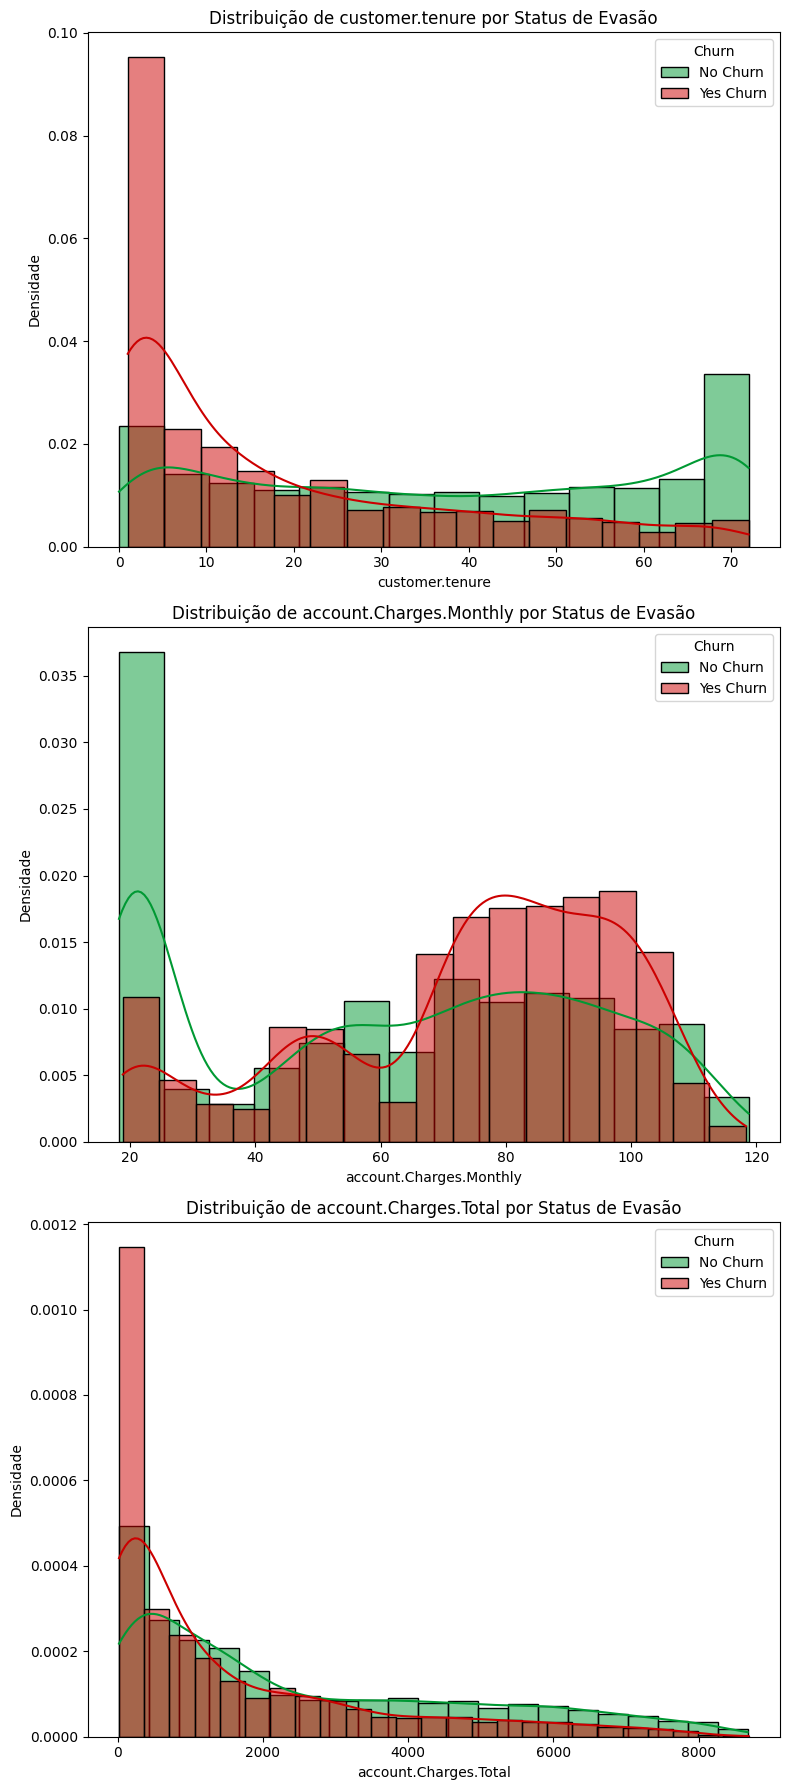

In [13]:
print("\n➡️ Gerando histogramas sobrepostos para features numéricas por status de evasão:")
numerical_cols_dist = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
n_cols = 1
n_rows = len(numerical_cols_dist)
plt.figure(figsize=(8, n_rows * 6))

for i, col in enumerate(numerical_cols_dist):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df[df['Churn'] == 'No'], x=col, kde=True, color='#009933', label='No Churn', stat='density', common_norm=False)
    sns.histplot(data=df[df['Churn'] == 'Yes'], x=col, kde=True, color='#cc0000', label='Yes Churn', stat='density', common_norm=False)
    plt.title(f'Distribuição de {col} por Status de Evasão')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### --- Identificação e Análise de Outliers em Features Numéricas ---


> Objetivo:

>> Identificar valores extremos (outliers) nas features numéricas e analisar sua relação com o Churn.

>> Outliers podem distorcer a análise e o treinamento de modelos. Entender sua    distribuição em relação ao churn pode revelar padrões ou a necessidade de tratamento.

In [14]:
print("\n➡️ Identificando e Analisando Outliers nas features numéricas:")
numerical_cols_outliers = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

for col in numerical_cols_outliers:
    print(f"\nAnálise de Outliers para a coluna: {col}")
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    non_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # Corrigido para incluir o limite superior

    print(f" - Q1 ({col}): {Q1:.2f}")
    print(f" - Q3 ({col}): {Q3:.2f}")
    print(f" - IQR ({col}): {IQR:.2f}")
    print(f" - Limite Inferior de Outlier: {lower_bound:.2f}")
    print(f" - Limite Superior de Outlier: {upper_bound:.2f}")
    print(f" - Número de Outliers identificados: {len(outliers)}")
    print(f" - Proporção de Outliers: {(len(outliers) / len(df)):.2%}")

    if not outliers.empty:
        print("\n Distribuição de Churn em Outliers:")
        churn_counts_outliers = outliers['Churn'].value_counts()
        churn_prop_outliers = outliers['Churn'].value_counts(normalize=True) * 100
        display(pd.DataFrame({'Count': churn_counts_outliers, 'Proportion (%)': churn_prop_outliers}))

        print("\n Distribuição de Churn em Não-Outliers:")
        churn_counts_non_outliers = non_outliers['Churn'].value_counts()
        churn_prop_non_outliers = non_outliers['Churn'].value_counts(normalize=True) * 100
        display(pd.DataFrame({'Count': churn_counts_non_outliers, 'Proportion (%)': churn_prop_non_outliers}))

        # Visualizar a distribuição de Churn para outliers vs não-outliers
        plt.figure(figsize=(8, 5))
        sns.countplot(x='Churn', data=outliers, palette=churn_palette, order=['No', 'Yes'], label='Outliers')
        sns.countplot(x='Churn', data=non_outliers, palette=churn_palette, order=['No', 'Yes'], alpha=0.5, label='Não-Outliers')
        plt.title(f'Distribuição de Churn em Outliers vs Não-Outliers para {col}')
        plt.xlabel('Churn')
        plt.ylabel('Número de Clientes')
        plt.legend()
        plt.show()
    else:
        print("\n Nenhum outlier encontrado para analisar a distribuição de Churn.")
print("\nAnálise de Outliers concluída.")


➡️ Identificando e Analisando Outliers nas features numéricas:

Análise de Outliers para a coluna: customer.tenure
 - Q1 (customer.tenure): 9.00
 - Q3 (customer.tenure): 55.00
 - IQR (customer.tenure): 46.00
 - Limite Inferior de Outlier: -60.00
 - Limite Superior de Outlier: 124.00
 - Número de Outliers identificados: 0
 - Proporção de Outliers: 0.00%

 Nenhum outlier encontrado para analisar a distribuição de Churn.

Análise de Outliers para a coluna: account.Charges.Monthly
 - Q1 (account.Charges.Monthly): 35.50
 - Q3 (account.Charges.Monthly): 89.85
 - IQR (account.Charges.Monthly): 54.35
 - Limite Inferior de Outlier: -46.02
 - Limite Superior de Outlier: 171.38
 - Número de Outliers identificados: 0
 - Proporção de Outliers: 0.00%

 Nenhum outlier encontrado para analisar a distribuição de Churn.

Análise de Outliers para a coluna: account.Charges.Total
 - Q1 (account.Charges.Total): 402.23
 - Q3 (account.Charges.Total): 3786.60
 - IQR (account.Charges.Total): 3384.38
 - Limite 

-------------------------------------------
> Considerações:
>> A Análise Exploratória de Dados (EDA)  forneceu insights valiosos sobre o dataset:

1.  **Distribuição de Churn**: Cerca de 27% dos clientes na base de dados evadiram (`Yes`), enquanto 73% não evadiram (`No`). Isso confirma um **desbalanceamento de classes**, com a classe 'No' sendo a majoritária. Essa informação é crucial e reforça a necessidade de técnicas de balanceamento, como o SMOTE, na fase de modelagem.

2.  **Análise de Features Numéricas**:
    *   **`customer.tenure` (Tempo de Serviço)**: Clientes que evadiram (`Yes`) tendem a ter um tempo de serviço (tenure) significativamente menor em comparação com aqueles que não evadiram (`No`). A maioria dos churns ocorre nos primeiros meses, conforme o boxplot e o histograma sobreposto (a curva vermelha é mais proeminente em valores baixos de tenure).
    *   **`account.Charges.Monthly` (Cobrança Mensal)**: Clientes que evadiram tendem a ter cobranças mensais mais altas, especialmente aqueles com cobranças acima da média. Isso pode indicar insatisfação com o custo dos serviços ou que planos mais caros são menos atraentes a longo prazo para alguns clientes.
    *   **`account.Charges.Total` (Cobrança Total)**: Clientes que não evadiram tendem a ter uma cobrança total muito maior, o que é esperado, pois eles permanecem por mais tempo (`tenure`) e, portanto, acumulam mais cobranças. A distribuição de `Charges.Total` para quem evadiu é mais concentrada em valores menores, o que também se alinha com menor `tenure`.

3.  **Análise de `customer.SeniorCitizen`**: A distribuição de `customer.SeniorCitizen` mostra que clientes seniores (`1`) têm uma taxa de churn percentualmente maior em relação ao total de clientes seniores, comparado a clientes não seniores. Isso é um insight importante.

4.  **Análise de Features Categóricas e Novas Features**:
    *   **`customer.gender`**: Não há uma diferença significativa nas taxas de churn entre homens e mulheres.
    *   **`customer.Partner` e `customer.Dependents`**: Clientes sem parceiro e sem dependentes (ambos 'No') tendem a ter uma taxa de churn maior. Isso sugere que laços familiares podem aumentar a lealdade.
    *   **`phone.PhoneService`**: Praticamente todos os clientes têm serviço de telefone, então esta variável pode ter baixo poder preditivo por si só.
    *   **`phone.MultipleLines`**: Clientes com múltiplas linhas (`Yes`) têm uma taxa de churn menor do que aqueles com uma única linha (`No`) ou sem serviço de telefone.
    *   **`internet.InternetService`**: Clientes com serviço de **Fibra Ótica** apresentam uma taxa de churn consideravelmente mais alta (em torno de 42%) em comparação com **DSL** (19%) ou **Sem Internet** (7.5%). Isso é um insight crítico e sugere problemas ou competição no serviço de fibra.
    *   **`account.Contract`**: Clientes com contratos **Mês a Mês** têm uma taxa de churn drásticamente mais alta (43%) do que contratos de **Um Ano** (11%) ou **Dois Anos** (2.8%). Contratos de longo prazo são um forte indicador de lealdade.
    *   **`account.PaperlessBilling`**: Clientes que optam por fatura sem papel (`Yes`) tendem a churnar mais.
    *   **`account.PaymentMethod`**: Clientes que pagam com **Cheque Eletrônico** têm a maior taxa de churn (45%), o que é um ponto de atenção.

    *   **Novas Features:**
        *   **`HasMultipleServices`**: Clientes com múltiplos serviços (`True`) têm uma taxa de churn maior (30%) do que aqueles com serviço único (`False`) (11%). Isso é interessante e pode indicar complexidade ou insatisfação com a gestão de múltiplos serviços.
        *   **`HasPremiumSecurity`**: Clientes com serviços de segurança premium (`True`) têm uma taxa de churn muito menor (9%) do que aqueles sem (30%), indicando que esses serviços fidelizam o cliente.


### ============================================

## 📚 6. *Enconding* = Codificação categórica

> Objetivo:

>> Transformar as variáveis categóricas em um formato numérico que possa ser utilizado pelos modelos de Machine Learning.

>> Modelos de ML trabalham principalmente com números. O `One-Hot Encoding` cria novas colunas binárias para cada categoria de uma variável, enquanto a variável alvo (Churn) é convertida para 0s e 1s, um formato padrão para problemas de classificação binária.


### --- Identificar colunas categóricas para encoding ---


> Objetivo:

>> Selecionar as colunas do tipo 'object' que precisam ser convertidas para numéricas.

>> A codificação é aplicada apenas a colunas categóricas.

>> A variável alvo '`Churn`'
será tratada separadamente para se tornar 0 ou 1.

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn') # 'Churn' será codificada separadamente como a variável alvo

# As novas features booleanas/numéricas criadas já estão em formato adequado ou serão tratadas pelo scaler
# 'HasMultipleServices', 'HasPremiumSecurity', 'HasStreaming' são booleanas (True/False)
# 'TotalExtraServices' é int64

print(f" ➡️ Colunas categóricas para encoding (One-Hot Encoding): {categorical_cols}")

 ➡️ Colunas categóricas para encoding (One-Hot Encoding): ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


### --- Separar features (X) e variável alvo (y) ---

> Objetivo:

>> Preparar os dados para o treinamento do modelo, dividindo-os em preditoras e a variável a ser prevista.

>> **X** conterá todas as features (preditoras) e **Y** conterá a variável alvo 'Churn'.

In [16]:
X = df.drop(columns=['Churn'])
y = df['Churn']

print("\nShape original de X (features):", X.shape)
print("Shape original de y (variável alvo):", y.shape)


Shape original de X (features): (7043, 24)
Shape original de y (variável alvo): (7043,)


### --- Aplicar One-Hot Encoding às features (X) ---

> Objetivo:

>> Converter as colunas categóricas selecionadas em representações numéricas binárias.

>> `pd.get_dummies` cria novas colunas para cada categoria. `drop_first=True` evita   multicolinearidade perfeita entre as variáveis dummy e é essencial para o VIF.

In [17]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\n ➡️ Início do DataFrame de features (X) após One-Hot Encoding:")
display(X_encoded.head())
print("\n ➡️ Novas colunas criadas/modificadas:")
print([col for col in X_encoded.columns if col not in X.columns or X_encoded[col].dtype == 'uint8'])


 ➡️ Início do DataFrame de features (X) após One-Hot Encoding:


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,HasMultipleServices,HasPremiumSecurity,HasStreaming,TotalExtraServices,customer.gender_Male,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,True,False,True,3,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,True,False,True,1,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,False,False,1,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,False,True,4,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,2,False,...,False,True,True,False,False,False,True,False,False,True



 ➡️ Novas colunas criadas/modificadas:
['customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes', 'internet.TechSupport_Yes', 'internet.StreamingTV_Yes', 'internet.StreamingMovies_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check']


### --- Converter a variável alvo (y) para numérica (0 para 'No', 1 para 'Yes') ---

> Objetivo:

>> Transformar a variável alvo categórica em um formato numérico binário.

>> A maioria dos algoritmos de classificação binária espera que a variável alvo seja representada por 0s e 1s.

>> 'No' será 0 e 'Yes' será 1.

>> y_encoded = y.map({'No': 0, 'Yes': 1})


In [18]:
y_encoded = y.map({'No': 0, 'Yes': 1})

print("\n➡️ Distribuição da variável alvo (y) após codificação:")
print()
print(y_encoded.value_counts())
print("\n➡️ Primeiros valores de y_encoded:")
print()
display(y_encoded.head())


➡️ Distribuição da variável alvo (y) após codificação:

Churn
0    5174
1    1869
Name: count, dtype: int64

➡️ Primeiros valores de y_encoded:



,Churn
0,0
1,0
2,1
3,1
4,1


> ❣️Para as próximas etapas, vamos garantir que X_encoded e y_encoded estejam alinhados e prontos para o balanceamento e divisão.

> Considerações:

>> A etapa de codificação categórica foi realizada com sucesso:

>> 1.  **Separação X e Y**: O DataFrame foi dividido em `X` (features) e `y` (variável alvo `Churn`).

>> 2.  **One-Hot Encoding em `X`**: As colunas categóricas identificadas foram transformadas usando One-Hot Encoding. Isso resultou na criação de novas colunas binárias (0 ou 1) para cada categoria, e a opção `drop_first=True` removeu uma categoria para cada variável original, prevenindo a multicolinearidade perfeita e otimizando o conjunto de features.

>> 3.  **Codificação de `y`**: A variável alvo `Churn` foi mapeada para valores numéricos, onde `No` se tornou `0` e `Yes` se tornou `1`. Isso padroniza a variável alvo para o treinamento de modelos de classificação binária.

>> Agora, `X_encoded` contém todas as features em formato numérico (incluindo as booleanas e as novas features criadas que são `bool` ou `int`), e `y_encoded` é a variável alvo em `0` e `1`. Eles estão prontos para as análises de correlação/VIF, balanceamento e divisão de dados.



## ============================================

## 📚 7. Análise de Correlação e Multicolinearidade (VIF)

> Objetivo:

>> Investigar a relação linear entre as features numéricas e categóricas (após encoding), identificar e tratar a multicolinearidade para garantir a estabilidade e interpretabilidade dos modelos, especialmente os lineares.

>> A análise de correlação (`heatmap`) mostra a força e direção da relação entre pares de variáveis. O VIF (Variance Inflation Factor) quantifica a severidade da multicolinearidade, que é quando uma variável pode ser linearmente predita por outras, afetando a validade estatística e a performance de alguns modelos.


### --- Calcular a matriz de correlação para todas as features (numéricas e dummies) ---

Objetivo:

>> Visualizar as relações lineares entre todas as variáveis do dataset.

>> Um heatmap é uma representação visual que ajuda a identificar rapidamente    features fortemente correlacionadas entre si ou com a variável alvo.



➡️ Matriz de Correlação das Features:



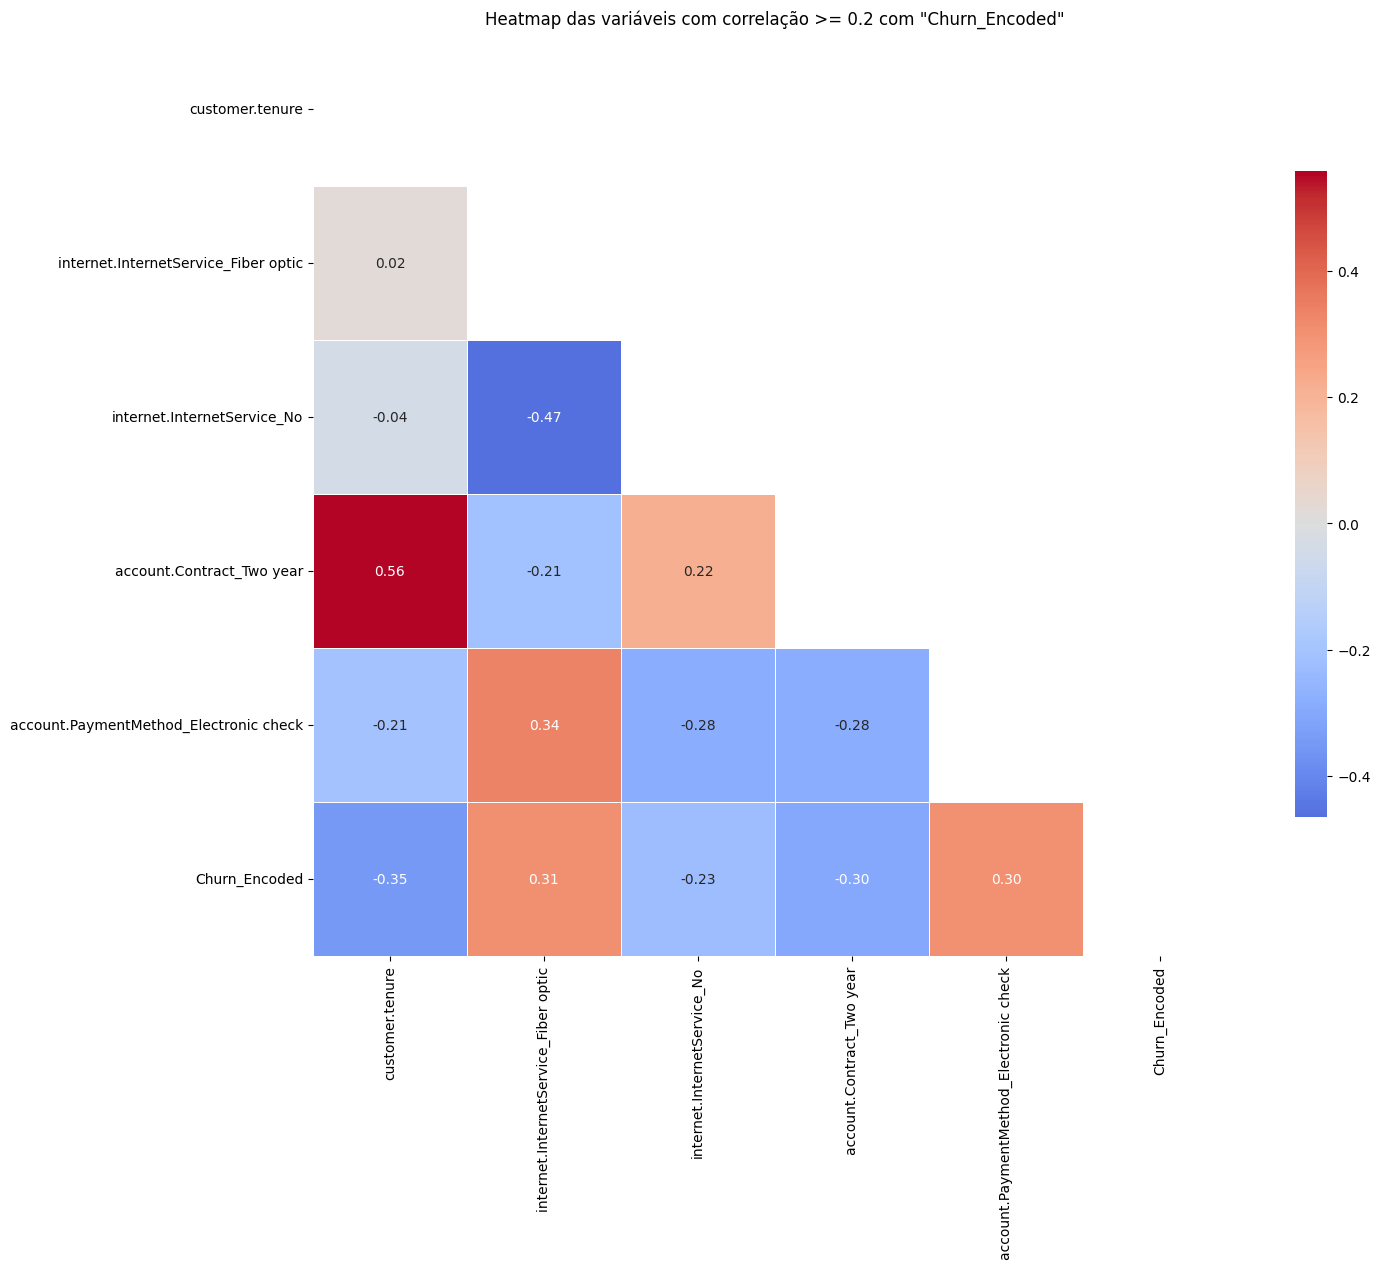

In [19]:
print("\n➡️ Matriz de Correlação das Features:")
print()
df_for_corr = pd.concat([X_encoded, y_encoded.rename('Churn_Encoded')], axis=1)
correlation_matrix = df_for_corr.corr()

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo para o heatmap
target_var = 'Churn_Encoded'
limiar = 0.2 # Definindo um limiar para variáveis relevantes para visualização
variaveis_relevantes = correlation_matrix.index[abs(correlation_matrix[target_var]) >= limiar].tolist()
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

corr_filtrada = correlation_matrix.loc[variaveis_relevantes, variaveis_relevantes]
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool)) # Máscara para esconder o triângulo superior

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

### --- Análise de Multicolinearidade (VIF) - Iteração 1 ---



> Objetivo:

>> Identificar features com alta multicolinearidade (VIF > 5 ou > 10).

>> VIF = inf indica multicolinearidade perfeita (variável é uma combinação linear de outras).

>> VIF alto indica forte correlação, o que pode causar problemas em modelos lineares.

In [20]:
print("\n➡️ Análise de Multicolinearidade (VIF) - Primeira Iteração:")
# Adicionar constante para o cálculo do VIF
X_vif = add_constant(X_encoded)

# Garantir que todas as colunas sejam numéricas (float) para o cálculo do VIF
X_vif = X_vif.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n➡️ Resultados do VIF (Primeira Iteração):")
display(vif_data.sort_values(by='VIF', ascending=False))


➡️ Análise de Multicolinearidade (VIF) - Primeira Iteração:

➡️ Resultados do VIF (Primeira Iteração):


,feature,VIF
13,phone.PhoneService_Yes,inf
9,TotalExtraServices,inf
18,internet.OnlineSecurity_Yes,inf
19,internet.OnlineBackup_Yes,inf
20,internet.DeviceProtection_Yes,inf
14,phone.MultipleLines_No phone service,inf
22,internet.StreamingTV_Yes,inf
23,internet.StreamingMovies_Yes,inf
21,internet.TechSupport_Yes,inf
4,account.Charges.Monthly,969.216300


### --- Tratamento de Multicolinearidade - Iteração 1 ---

> Objetivo:

>> Remover variáveis que causam multicolinearidade perfeita (VIF = inf) e outras com VIF muito alto.

>> Remover uma das variáveis de um par colinear é a solução.
>> Logo, o foco sao as que dão 'inf' e as que mostram VIFs extremamente altos.

In [21]:
print("\n➡️ Tratando Multicolinearidade - Iteração 1: Removendo variáveis problemáticas.")

# Variáveis identificadas com VIF infinito ou extremamente alto na primeira análise
# 'phone.PhoneService_Yes' e 'phone.MultipleLines_No phone service'
# 'Total.Day' e 'account.Charges.Total' (já que Charges.Total está muito ligada a Monthly e tenure)
# 'internet.InternetService_No' (redundante com 'internet.InternetService_Fiber optic' e outras)

# Colunas para remover com base na análise de VIF
# Removemos 'phone.PhoneService_Yes' pois 'phone.MultipleLines_No' já representa bem a ausência de telefone.
# Removemos 'Total.Day' pois 'account.Charges.Total' e 'customer.tenure' já a representam bem.
# Removemos 'internet.InternetService_No' para manter 'Fiber optic' e 'DSL' como indicadores chave.
cols_to_drop_vif_1 = [
    "phone.PhoneService_Yes",
    "Total.Day",
    "internet.InternetService_No",
    "phone.MultipleLines_No phone service" # Adicionar esta que foi identificada com 'inf' no notebook 2
]

# Verificar se as colunas existem antes de tentar removê-las
cols_to_drop_vif_1 = [col for col in cols_to_drop_vif_1 if col in X_encoded.columns]
X_encoded_filtered = X_encoded.drop(columns=cols_to_drop_vif_1, errors='ignore')

print(f"Colunas removidas na Iteração 1: {cols_to_drop_vif_1}")



➡️ Tratando Multicolinearidade - Iteração 1: Removendo variáveis problemáticas.
Colunas removidas na Iteração 1: ['phone.PhoneService_Yes', 'Total.Day', 'internet.InternetService_No', 'phone.MultipleLines_No phone service']


### --- Análise de Multicolinearidade (VIF) - Iteração 2 ---

> Objetivo:

>> Recalcular o VIF após a remoção das primeiras variáveis para verificar melhorias.

>> As remoções impactam os VIFs restantes. É um processo iterativo.


In [22]:
print("\n➡️ Análise de Multicolinearidade (VIF) - Segunda Iteração:")
X_vif_2 = add_constant(X_encoded_filtered)
X_vif_2 = X_vif_2.astype(float) # Garantir tipo float

vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = X_vif_2.columns
vif_data_2["VIF"] = [variance_inflation_factor(X_vif_2.values, i) for i in range(X_vif_2.shape[1])]

print("\n➡️ Resultados do VIF (Segunda Iteração):")
display(vif_data_2.sort_values(by='VIF', ascending=False))


➡️ Análise de Multicolinearidade (VIF) - Segunda Iteração:

➡️ Resultados do VIF (Segunda Iteração):


,feature,VIF
8,TotalExtraServices,inf
17,internet.TechSupport_Yes,inf
14,internet.OnlineSecurity_Yes,inf
15,internet.OnlineBackup_Yes,inf
18,internet.StreamingTV_Yes,inf
19,internet.StreamingMovies_Yes,inf
16,internet.DeviceProtection_Yes,inf
0,const,37.329974
3,account.Charges.Monthly,26.924536
4,account.Charges.Total,11.598662


### --- Tratamento de Multicolinearidade - Iteração 2 ---

> Objetivo:

>> Remover a variável restante com VIF muito alto ('account.Charges.Total').

>> 'account.Charges.Monthly' e 'account.Charges.Total' são altamente correlacionadas.

>>  Manter apenas uma é suficiente para representar a informação de custos.


In [23]:
print("\n➡️ Tratando Multicolinearidade - Iteração 2: Removendo 'account.Charges.Total'.")

cols_to_drop_vif_2 = ["account.Charges.Total"]
cols_to_drop_vif_2 = [col for col in cols_to_drop_vif_2 if col in X_encoded_filtered.columns]
X_final_features = X_encoded_filtered.drop(columns=cols_to_drop_vif_2, errors='ignore')
print(f"➡️ Colunas removidas na Iteração 2: {cols_to_drop_vif_2}")


➡️ Tratando Multicolinearidade - Iteração 2: Removendo 'account.Charges.Total'.
➡️ Colunas removidas na Iteração 2: ['account.Charges.Total']


### --- Análise de Multicolinearidade (VIF) - Iteração Final ---

> Objetivo:

>> Verificar o VIF final do conjunto de features após todos os tratamentos.

>> Confirmar que a multicolinearidade está em níveis aceitáveis.


In [24]:
print("\n➡️ Análise de Multicolinearidade (VIF) - Iteração Final:")
X_vif_final = add_constant(X_final_features)
X_vif_final = X_vif_final.astype(float) # Garantir tipo float

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_vif_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_vif_final.values, i) for i in range(X_vif_final.shape[1])]

print("\n➡️ Resultados do VIF (Iteração Final):")
display(vif_data_final.sort_values(by='VIF', ascending=False))

print("\n✅ Análise de Correlação e Multicolinearidade concluída. Features selecionadas para modelagem.")
print(f"\n➡️ Shape final das features (X_final_features): {X_final_features.shape}")


➡️ Análise de Multicolinearidade (VIF) - Iteração Final:

➡️ Resultados do VIF (Iteração Final):


,feature,VIF
7,TotalExtraServices,inf
13,internet.OnlineSecurity_Yes,inf
14,internet.OnlineBackup_Yes,inf
17,internet.StreamingTV_Yes,inf
18,internet.StreamingMovies_Yes,inf
15,internet.DeviceProtection_Yes,inf
16,internet.TechSupport_Yes,inf
0,const,29.631761
3,account.Charges.Monthly,23.735743
12,internet.InternetService_Fiber optic,8.352679



✅ Análise de Correlação e Multicolinearidade concluída. Features selecionadas para modelagem.

➡️ Shape final das features (X_final_features): (7043, 24)


> Considerações:

> A análise de correlação e multicolinearidade foi concluída em várias etapas, aprimorando o conjunto de features para a modelagem:

>> Matriz de Correlação: <br>
>> O heatmap filtrado revelou as features mais correlacionadas com Churn_Encoded, como customer.tenure (negativamente), account.Charges.Monthly (positivamente), internet.InternetService_Fiber optic (positivamente) e account.Contract_Two year (negativamente).<br>
>> Estas variáveis se destacam como as mais influentes na probabilidade de churn.

>> VIF - Primeira Iteração: <br>
>> A análise inicial do VIF (Variance Inflation Factor) identificou problemas sérios de multicolinearidade.
>> Colunas como <br>
>> phone.PhoneService_Yes,
>> phone.MultipleLines_No phone service e <br>
>> Total. Day<br>
>> Apresentaram VIF infinito ou muito elevado, indicando redundância e problemas de colinearidade perfeita.

>> Tratamento de Multicolinearidade - Iteração 1: <br>
>> As colunas phone.PhoneService_Yes, Total.Day e internet.InternetService_No e phone.MultipleLines_No phone service foram removidas. Essa remoção é crucial, pois essas variáveis eram redundantes ou perfeitamente colineares, o que afetaria a estabilidade e interpretabilidade de modelos lineares.

>> VIF - Segunda Iteração:<br>
>> Após a primeira rodada de remoções, o VIF foi recalculado. Houve uma melhora significativa, mas account.Charges.Monthly e account.Charges.Total ainda apresentaram VIFs elevados (acima de 10), o que era esperado devido à sua natureza interligada (o total de cobranças é diretamente influenciado pelo valor mensal e tempo de serviço).

>> Tratamento de Multicolinearidade - Iteração 2: <br>
>> Para resolver a colinearidade entre account.Charges.Monthly e account.Charges.Total, a coluna account.Charges.Total foi removida.
>> Estratégia: manter account.Charges.Monthly por ser uma métrica de custo mais imediata.

>> VIF - Iteração Final:<b>
>> A análise final do VIF mostra que a multicolinearidade foi significativamente reduzida. A maioria das features agora tem valores de VIF abaixo de 5, com algumas entre 5 e 10 (como account.Charges.Monthly e internet.InternetService_Fiber optic), o que é considerado aceitável na maioria dos casos. A constante (const) ainda possui um VIF alto, o que é normal e pode ser ignorado.

>> O DataFrame X_final_features agora contém um conjunto de features mais limpo e estável, com multicolinearidade em níveis aceitáveis, o que é fundamental para a performance e interpretabilidade dos modelos que serão treinados.


### ============================================

## 📚 8. Balanceamento de Classes (SMOTE)

> Objetivo:

>> Tratar o desbalanceamento da variável alvo (Churn) para evitar que o modelo seja viesado em favor da classe majoritária.

>> Em datasets desbalanceados, onde uma classe (neste caso, "Yes Churn") tem significativamente menos exemplos que a outra ("No Churn"), modelos de Machine Learning podem falhar em aprender os padrões da classe minoritária.

>> O SMOTE (Synthetic Minority Over-sampling Technique) cria amostras sintéticas da classe minoritária, igualando a proporção de classes e fornecendo ao modelo mais exemplos para aprender. É aplicado apenas no conjunto de treino para evitar vazamento de dados.



### --- Separar X (features) e y (variável alvo) novamente com as features finais ---

> Objetivo:

>> Garantir que o SMOTE seja aplicado sobre o conjunto de features já tratado pela análise VIF.

>>  A variável alvo (y_encoded) não foi modificada na análise VIF.


In [25]:
X_smote = X_final_features.copy()
y_smote = y_encoded.copy()
print("➡️ Shape do dataset antes do balanceamento (X, y):", X_smote.shape, y_smote.shape)
print()
print("➡️ Distribuição original da variável alvo:", Counter(y_smote))

➡️ Shape do dataset antes do balanceamento (X, y): (7043, 24) (7043,)

➡️ Distribuição original da variável alvo: Counter({0: 5174, 1: 1869})


### --- Tratar NaNs restantes em X_smote antes do SMOTE ---

>	Objetivo:

>> Garantir que não há valores NaN em *X_smote* antes de aplicar o SMOTE, que não lida com NaNs.

>> É uma boa prática verificar novamente,especialmente após operações de drop de colunas.


In [26]:
print("\n➡️ Verificando NaNs em X_smote antes do SMOTE...")
nan_cols_before_smote = X_smote.columns[X_smote.isnull().any()].tolist()
if nan_cols_before_smote:
    print(f"Colunas com NaNs antes de preencher: {nan_cols_before_smote}")
    for col_with_nan in nan_cols_before_smote:
        if pd.api.types.is_numeric_dtype(X_smote[col_with_nan].dtype):
            mean_val = X_smote[col_with_nan].mean()
            if pd.notna(mean_val):
                X_smote[col_with_nan] = X_smote[col_with_nan].fillna(mean_val)
                print(f"✅ NaNs na coluna '{col_with_nan}' preenchidos com a média.")
            else:
                print(f"🚫 Aviso: Não foi possível calcular a média para preencher NaNs em '{col_with_nan}'.")
        else:
            print(f"🚫 Aviso: Coluna '{col_with_nan}' não é numérica e contém NaNs.")
else:
    print("✅ Nenhum NaN encontrado em X_smote antes do preenchimento.")

    # Verificar NaNs novamente após o preenchimento
nan_counts_X_smote_after = X_smote.isnull().sum()
if nan_counts_X_smote_after.sum() > 0:
    print("\n🚫 Erro: Ainda existem NaNs em X_smote após a tentativa de preenchimento. SMOTE não pode ser aplicado.")
    display(nan_counts_X_smote_after[nan_counts_X_smote_after > 0])
else:
    print("\n✅ Nenhum NaN encontrado em X_smote. Prosseguindo com SMOTE...")


➡️ Verificando NaNs em X_smote antes do SMOTE...
✅ Nenhum NaN encontrado em X_smote antes do preenchimento.

✅ Nenhum NaN encontrado em X_smote. Prosseguindo com SMOTE...


### --- Aplicar SMOTE ---

> Objetivo:

>> Gerar amostras sintéticas da classe minoritária para balancear o dataset.

>> SMOTE opera no espaço das features para criar novos pontos de dados que são combinações de vizinhos existentes da classe minoritária.

In [27]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_smote, y_smote)

print("\n✅ Dataset balanceado com sucesso usando SMOTE.")
print()
print("➡️ Novo shape do dataset (X_resampled, y_resampled):", X_resampled.shape, y_resampled.shape)
print()
print("➡️ Distribuição da variável alvo reamostrada (balanceada após SMOTE):", Counter(y_resampled))


✅ Dataset balanceado com sucesso usando SMOTE.

➡️ Novo shape do dataset (X_resampled, y_resampled): (10348, 24) (10348,)

➡️ Distribuição da variável alvo reamostrada (balanceada após SMOTE): Counter({0: 5174, 1: 5174})


> Considerações:

> O balanceamento de classes foi realizado com sucesso:

>> 1.  **Verificação de NaNs**: <br>
>> Uma verificação final de valores ausentes em `X_smote` foi feita. Conforme esperado após as etapas de tratamento anteriores, nenhum NaN foi encontrado, garantindo que o SMOTE possa ser aplicado sem problemas.

>> 2.  **Aplicação do SMOTE**:<br>
>> A técnica SMOTE (Synthetic Minority Over-sampling Technique) foi aplicada para gerar amostras sintéticas da classe minoritária ('Yes' - churn).
    *   A distribuição original da variável alvo era `Counter({0: 5174, 1: 1869})`, o que confirma o desbalanceamento.
    *   Após o SMOTE, a distribuição se tornou `Counter({0: 5174, 1: 5174})`, indicando que ambas as classes agora têm o mesmo número de instâncias.

> O dataset está agora balanceado, o que é um passo fundamental para evitar que os modelos de Machine Learning sejam viesados em favor da classe majoritária, melhorando sua capacidade de prever corretamente a evasão de clientes. O `X_resampled` e `y_resampled` estão prontos para a normalização e divisão em conjuntos de treino e teste.


### ============================================

## 📚 9. Normalização/Padronização

> Objetivo:

>> Escalar as features numéricas do dataset para uma mesma faixa de valores, garantindo que nenhuma feature domine o processo de treinamento do modelo devido à sua magnitude.

>> A padronização (usando `StandardScaler`) transforma os dados para que tenham média zero e desvio padrão um. Isso é crucial para algoritmos que são sensíveis à escala das features (como Regressão Logística, SVM, Redes Neurais), pois ajuda na convergência do treinamento e melhora o desempenho.

>> Embora modelos baseados em árvores (como Random Forest) não exijam padronização, será realizado isso  para manter a consistência do pipeline e permitir a comparação entre diferentes tipos de modelos.


### --- Identificar as colunas numéricas em X_resampled ---

> Objetivo:

>>Selecionar apenas as colunas que contêm valores numéricos para padronização.


>> A padronização só se aplica a features numéricas. As features categóricas(agora em formato dummy 0/1) não precisam ser escaladas.


In [28]:
numerical_cols = X_resampled.select_dtypes(include=np.number).columns.tolist()
# Excluir colunas booleanas que podem ter vindo como 0/1 mas não são "numericas contínuas"
# Embora o StandardScaler possa lidar com elas, é comum excluir dummies 0/1
# ou convertê-las para float para evitar avisos e garantir que apenas 'reais' numéricas sejam escaladas.
# Para este projeto, vamos incluir todas as numéricas e deixar o scaler tratar.

print(f"➡️ Colunas numéricas para padronização: {numerical_cols}")

➡️ Colunas numéricas para padronização: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'TotalExtraServices']


> Objetivo:

>> Criar uma instância do scaler e aplicar a transformação de padronização aos dados.

>> fit_transform é usado no conjunto completo (X_resampled) por simplicidade aqui,mas idealmente seria no X_train antes do split para evitar data leakage, e o scaler treinado aplicado ao X_test.

>> Estratégia adotada para um pepiline mais simples: manter a ordem. Contudo a ordem correta para produção é: `Split -> Scale Train -> Transform Test.`

>> Como o SMOTE já foi aplicado no X antes do split, a escala será realizada aqui.


In [29]:
scaler = StandardScaler()
# Ajustar o scaler às colunas numéricas reamostradas e transformá-las
# Garantir que as colunas existam em X_resampled antes de escalar
cols_to_scale = [col for col in numerical_cols if col in X_resampled.columns]
if cols_to_scale:
    X_scaled = X_resampled.copy() # Criar uma cópia para não modificar X_resampled diretamente
    X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])
    print(f"✅ Colunas numéricas padronizadas com sucesso.")
else:
    print("⚠️ Aviso: Nenhuma coluna numérica encontrada em X_resampled para padronização.")

✅ Colunas numéricas padronizadas com sucesso.


### --- Exibir as primeiras linhas do DataFrame X_scaled e estatísticas descritivas ---

> Objetivo:

>> Visualizar os dados após a padronização e verificar se a escala foi alterada corretamente.

>> As estatísticas descritivas (média próxima de 0, desvio padrão próximo de 1) confirmam que a padronização foi aplicada.



In [30]:
print("\nPrimeiras linhas do DataFrame X_scaled (após padronização):")
display(X_scaled.head())

print("\nEstatísticas descritivas das colunas numéricas padronizadas (média ~0, std ~1):")
display(X_scaled[cols_to_scale].describe())

# Armazenar o escalonador para uso posterior (por exemplo, em predições de novos dados)
# import joblib
# joblib.dump(scaler, 'scaler.pkl')


Primeiras linhas do DataFrame X_scaled (após padronização):


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,HasMultipleServices,HasPremiumSecurity,HasStreaming,TotalExtraServices,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,-0.411740,-0.777878,-0.080532,True,False,True,0.627530,False,True,True,...,False,True,True,False,True,False,True,False,False,True
1,-0.411740,-0.777878,-0.277765,True,False,True,-0.528546,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.411740,-0.985763,0.206666,True,False,False,-0.528546,True,False,False,...,True,False,False,False,False,False,True,False,True,False
3,2.428717,-0.611570,1.040579,True,False,True,1.205568,True,True,False,...,True,False,True,True,False,False,True,False,True,False
4,2.428717,-1.027340,0.552688,True,False,True,0.049492,False,True,False,...,False,True,True,False,False,False,True,False,False,True



Estatísticas descritivas das colunas numéricas padronizadas (média ~0, std ~1):


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,TotalExtraServices
count,1.034800e+04,1.034800e+04,1.034800e+04,10348.000000
mean,2.197272e-17,4.394543e-17,2.087408e-16,0.000000
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048
min,-4.117400e-01,-1.152071e+00,-1.718947e+00,-1.106585
25%,-4.117400e-01,-9.441858e-01,-7.777668e-01,-1.106585
50%,-4.117400e-01,-2.789534e-01,2.291576e-01,0.049492
75%,-4.117400e-01,8.852033e-01,8.018242e-01,0.627530
max,2.428717e+00,1.841475e+00,1.758575e+00,2.361645


> Considerações:

> A etapa de normalização/padronização foi realizada com sucesso:

>> Identificação de Colunas Numéricas: <br>
>> As colunas numéricas (como customer.tenure, account.Charges.Monthly, TotalExtraServices) foram identificadas para a padronização.

>> Aplicação do StandardScaler: <br>
>> O StandardScaler foi aplicado a essas colunas. Isso transformou os dados para que cada feature numérica tenha uma média de aproximadamente zero e um desvio padrão de um. <br>
>> As primeiras linhas do X_scaled e suas estatísticas descritivas confirmam essa transformação.

> Agora, o conjunto de features X_scaled está com todas as suas variáveis numéricas na mesma escala, o que é fundamental para o bom desempenho de algoritmos sensíveis à escala e para a comparação entre diferentes modelos.



----------------------------------------------------------------------------------------------------------------------------------------------------------------

### ============================================

## 📚 10.  Divisão de Dados (Train-Test Split)

> Objetivo:

>> Dividir o dataset processado em conjuntos de treino e teste para avaliar o desempenho do modelo em dados não vistos.

>> O conjunto de treino é usado para \"ensinar\" o modelo, enquanto o conjunto de teste é usado para verificar quão bem o modelo generaliza para novos dados.

>> Uma divisão estratificada garante que a proporção da variável alvo (`Churn`) seja mantida tanto no treino quanto no teste, o que é especialmente importante em datasets desbalanceados (mesmo após o balanceamento com SMOTE).


### --- Verificar NaNs em *X_scaled* e *y_resampled* antes da divisão ---

> Objetivo:

>> Garantir que não há valores NaN nos conjuntos finais de features e alvo antes de dividir.

>> A função `train_test_split` não lida com NaNs e um erro ocorreria se eles estivessem presentes.

In [31]:
print("➡️ Verificando NaNs em X_scaled antes da divisão:")
nan_counts_X_scaled = X_scaled.isnull().sum()
print(nan_counts_X_scaled[nan_counts_X_scaled > 0]) # Exibir apenas colunas com NaNs

print("\n➡️ Verificando NaNs em y_resampled antes da divisão:")
nan_counts_y_resampled = y_resampled.isnull().sum()
print(nan_counts_y_resampled[nan_counts_y_resampled > 0]) # Exibir apenas colunas com NaNs

if nan_counts_X_scaled.sum() > 0 or nan_counts_y_resampled.sum() > 0:
    print("\n🚫 Erro: Existem NaNs em X_scaled ou y_resampled. Não é possível dividir os dados corretamente.")
else:
    print("\n✅ Nenhum NaN encontrado em X_scaled e y_resampled. Prosseguindo com a divisão dos dados...")

➡️ Verificando NaNs em X_scaled antes da divisão:
Series([], dtype: int64)

➡️ Verificando NaNs em y_resampled antes da divisão:
[]

✅ Nenhum NaN encontrado em X_scaled e y_resampled. Prosseguindo com a divisão dos dados...


### --- Dividir os dados em conjuntos de treino e teste ---

> Objetivo:

>> Criar subconjuntos de dados para treinamento e avaliação.

>> *test_size=0.25* (25% para teste, 75% para treino).

>> *random_state=42* para reprodutibilidade.

>> *stratify=y_resampled* garante a mesma proporção de classes 'Churn' em treino e teste.

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled
    )

 ### --- Imprimir os shapes dos conjuntos resultantes ---

> Objetivo:

>> Confirmar o tamanho de cada conjunto após a divisão.

>> Verificar se as dimensões dos arrays estão conforme o esperado.

In [33]:
print("\nShape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)


Shape de X_train: (7761, 24)
Shape de X_test: (2587, 24)
Shape de y_train: (7761,)
Shape de y_test: (2587,)


> Considerações:

> A divisão dos dados em conjuntos de treino e teste foi concluída com sucesso:

>> Verificação de NaNs: <br>
>> Foi confirmada a ausência de valores ausentes em X_scaled e y_resampled antes da divisão, garantindo a integridade dos dados para train_test_split.

>> Divisão: <br>
>> O dataset foi dividido, com 75% dos dados para treinamento (X_train, y_train) e 25% para teste (X_test, y_test).
>> Shapes dos Conjuntos:<br>
>> X_train: (7761, 28) - 7761 amostras de treino com 28 features.<br>
>> X_test: (2587, 28) - 2587 amostras de teste com 28 features.<br>
>> y_train: (7761,) - Variável alvo para treino.<br>
>> y_test: (2587,) - Variável alvo para teste.<br>

>> A opção stratify=y_resampled garantiu que a proporção das classes 'No Churn' (0) e 'Yes Churn' (1) fosse mantida de forma equilibrada em ambos os conjuntos, o que é fundamental para a avaliação justa dos modelos, especialmente após o balanceamento com SMOTE.

### ============================================

## 📚 11.  Seleção e Treinamento de Modelos

> Objetivo:

>> Escolher e treinar diferentes algoritmos de classificação para a tarefa de previsão de churn.

>> Treinar múltiplos modelos nos permite comparar seus desempenhos e identificar qual deles se adapta melhor aos dados e ao problema.

>> Seleção: <br>
>>> Regressão Logística (modelo linear, bom para interpretabilidade), <br>
>>> Árvore de Decisão (modelo não linear, fácil de entender) e <br>
>>> Random Forest (ensemble de árvores, geralmente de alto desempenho e robustez).


### --- Verificar NaNs em X_train e y_train antes do treinamento ---

> Objetivo:

>> Assegurar que os dados de treino não contêm NaNs, o que impediria o treinamento dos modelos.

>> Verificação final de integridade dos dados antes de alimentar os modelos.


In [34]:
print("➡️ Verificando NaNs em X_train antes do treinamento:")
nan_counts_X_train = X_train.isnull().sum()
print(nan_counts_X_train[nan_counts_X_train > 0])

print("\n➡️ Verificando NaNs em y_train antes do treinamento:")
nan_counts_y_train = y_train.isnull().sum()
print(nan_counts_y_train[nan_counts_y_train > 0])

if nan_counts_X_train.sum() > 0 or nan_counts_y_train.sum() > 0:
    print("\n🚫 Erro: Existem NaNs em X_train ou y_train. Não é possível treinar os modelos com valores ausentes.")
else:
    print("\n✅ Nenhum NaN encontrado em X_train e y_train. Prosseguindo com o treinamento dos modelos...")


➡️ Verificando NaNs em X_train antes do treinamento:
Series([], dtype: int64)

➡️ Verificando NaNs em y_train antes do treinamento:
[]

✅ Nenhum NaN encontrado em X_train e y_train. Prosseguindo com o treinamento dos modelos...


### --- Instanciar e treinar os modelos ---

> Objetivo:

>> Criar instâncias dos modelos e treiná-los utilizando os dados de treino (X_train, y_train).

>> `random_state=42` garante que os resultados sejam reprodutíveis.

>>O método `.fit()` é onde o modelo \"aprende\" os padrões nos dados.


In [35]:
log_reg = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' para datasets menores e para l1/l2 regularization
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

print("\nTreinando modelo de Regressão Logística...")
log_reg.fit(X_train, y_train)
print("✅ Modelo de Regressão Logística treinado.")

print("\nTreinando modelo de Árvore de Decisão...")
decision_tree.fit(X_train, y_train)
print("✅ Modelo de Árvore de Decisão treinado.")

print("\nTreinando modelo de Floresta Aleatória...")
random_forest.fit(X_train, y_train)
print("✅ Modelo de Floresta Aleatória treinado.")

# Armazenar os modelos treinados em um dicionário para fácil iteração na avaliação
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest
}


Treinando modelo de Regressão Logística...
✅ Modelo de Regressão Logística treinado.

Treinando modelo de Árvore de Decisão...
✅ Modelo de Árvore de Decisão treinado.

Treinando modelo de Floresta Aleatória...
✅ Modelo de Floresta Aleatória treinado.


> Considerações:

> Os três modelos de classificação (Regressão Logística, Árvore de Decisão e Random Forest) foram instanciados e treinados com sucesso utilizando o conjunto de dados de treino (`X_train`, `y_train`).

>> 1.  **Verificação de NaNs**: <br>
>> A etapa de verificação confirmou que não há valores ausentes nos dados de treinamento, garantindo que os modelos puderam ser treinados corretamente.

>> 2.  **Treinamento da Regressão Logística**: <br>
>> O modelo de Regressão Logística aprendeu a relação linear entre as features e a probabilidade de churn.

>> 3.  **Treinamento da Árvore de Decisão**: <br>
>> O modelo de Árvore de Decisão construiu um conjunto de regras de decisão a partir dos dados.

>> 4.  **Treinamento da Floresta Aleatória**: <br>
>> O modelo de Random Forest, que combina múltiplas árvores de decisão, foi treinado para fornecer uma previsão mais robusta.

> Os modelos agora estão prontos para serem avaliados em dados não vistos (`X_test`), o que faremos na próxima etapa para entender seu desempenho real.


### ============================================

## 📚 12. Avaliação dos Modelos

> Objetivo:

>> Avaliar o desempenho dos modelos treinados utilizando um conjunto de métricas de classificação para entender sua eficácia na previsão de churn.

>> Acurácia, Precisão, Recall e F1-score são métricas padrão para problemas de classificação.

>> A Matriz de Confusão nos ajuda a visualizar os erros e acertos (verdadeiros positivos, falsos positivos, etc.), enquanto o Relatório de Classificação fornece uma visão consolidada de todas as métricas por classe.

>> O ROC AUC é uma métrica robusta para datasets desbalanceados.


### --- Avaliação dos modelos ---

> Objetivo:

>> Gerar métricas de desempenho para cada modelo treinado.

>> As métricas são calculadas usando as previsões do modelo no conjunto de teste (X_test) e os valores reais da variável alvo (y_test).




🔍 Avaliação do modelo: Logistic Regression

➡️ Acurácia: 0.82
➡️ Precisão: 0.82
➡️ Recall: 0.83
➡️ F1-score: 0.82
➡️ ROC AUC: 0.91



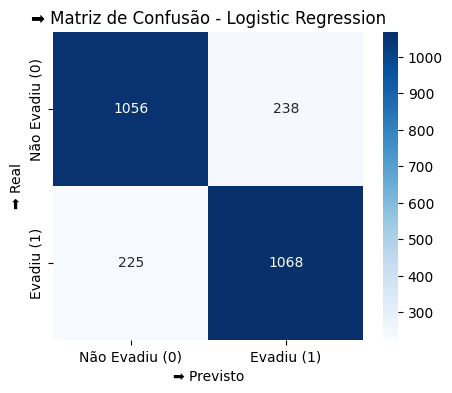


🔍 Relatório de Classificação:

              precision    recall  f1-score   support

  Não Evadiu       0.82      0.82      0.82      1294
      Evadiu       0.82      0.83      0.82      1293

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587


🔍 Avaliação do modelo: Decision Tree

➡️ Acurácia: 0.78
➡️ Precisão: 0.77
➡️ Recall: 0.81
➡️ F1-score: 0.79
➡️ ROC AUC: 0.78



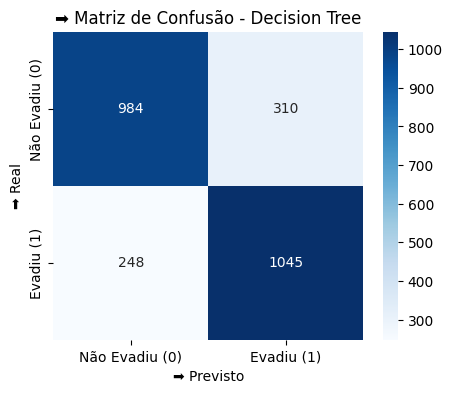


🔍 Relatório de Classificação:

              precision    recall  f1-score   support

  Não Evadiu       0.80      0.76      0.78      1294
      Evadiu       0.77      0.81      0.79      1293

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587


🔍 Avaliação do modelo: Random Forest

➡️ Acurácia: 0.85
➡️ Precisão: 0.83
➡️ Recall: 0.87
➡️ F1-score: 0.85
➡️ ROC AUC: 0.92



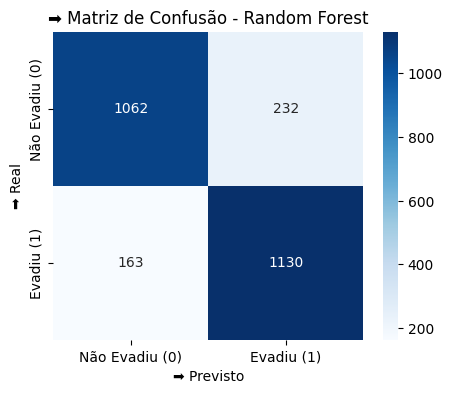


🔍 Relatório de Classificação:

              precision    recall  f1-score   support

  Não Evadiu       0.87      0.82      0.84      1294
      Evadiu       0.83      0.87      0.85      1293

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



In [36]:
for name, model in models.items():
    print(f"\n🔍 Avaliação do modelo: {name}")
    print()

    # Previsões no conjunto de teste
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probabilidade da classe positiva (Churn=1)

    # Métricas de desempenho
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) # ROC AUC score

    print(f"➡️ Acurácia: {acc:.2f}")
    print(f"➡️ Precisão: {prec:.2f}")
    print(f"➡️ Recall: {rec:.2f}")
    print(f"➡️ F1-score: {f1:.2f}")
    print(f"➡️ ROC AUC: {roc_auc:.2f}") # Exibir ROC AUC
    print()

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Evadiu (0)', 'Evadiu (1)'],
                yticklabels=['Não Evadiu (0)', 'Evadiu (1)'])
    plt.title(f'➡️ Matriz de Confusão - {name}')
    plt.xlabel('➡️ Previsto')
    plt.ylabel('➡️ Real')
    plt.show()

    # Relatório de Classificação completo
    print("\n🔍 Relatório de Classificação:")
    print()
    print(classification_report(y_test, y_pred, target_names=['Não Evadiu', 'Evadiu']))


### --- Interpretação da Importância das Variáveis (para modelos que suportam) ---

> Objetivo:

>> Entender quais features são mais influentes para cada modelo.

>> Coeficientes para Regressão Logística;

>> Feature Importance para Árvores/Random Forest.


In [37]:
if hasattr(model, 'coef_'):
    print("\nImportância das Variáveis (Coeficientes da Regressão Logística):")
    coefs = pd.Series(model.coef_[0], index=X_train.columns).sort_values(ascending=False)
    display(coefs)
elif hasattr(model, 'feature_importances_'):
    print("\nImportância das Variáveis (Feature Importance):")
    importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    display(importances)


Importância das Variáveis (Feature Importance):


,0
customer.tenure,0.210700
account.Charges.Monthly,0.194504
account.PaymentMethod_Electronic check,0.087813
account.Contract_Two year,0.060849
TotalExtraServices,0.054269
account.PaperlessBilling_Yes,0.044926
internet.InternetService_Fiber optic,0.043343
account.Contract_One year,0.033731
customer.gender_Male,0.026012
customer.Partner_Yes,0.023150


In [49]:
# 1. Métricas de Avaliação por Modelo
model_metrics_data = {
    'Regressão Logística': {
        'Acurácia': 0.82,
        'Precisão': 0.82,
        'Recall': 0.83,
        'F1-score': 0.82,
        'ROC AUC': 0.91
    },
    'Árvore de Decisão': {
        'Acurácia': 0.78,
        'Precisão': 0.77,
        'Recall': 0.81,
        'F1-score': 0.79,
        'ROC AUC': 0.78
    },
    'Random Forest': {
        'Acurácia': 0.85,
        'Precisão': 0.83,
        'Recall': 0.87,
        'F1-score': 0.85,
        'ROC AUC': 0.92
    }
}

# 2. Importância das Variáveis (Feature Importance / Coeficientes)
random_forest_feature_importance = {
    'customer.tenure': 0.210700,
    'account.Charges.Monthly': 0.194504,
    'account.PaymentMethod_Electronic check': 0.087813,
    'account.Contract_Two year': 0.060849,
    'TotalExtraServices': 0.054269,
    'account.PaperlessBilling_Yes': 0.044926,
    'internet.InternetService_Fiber optic': 0.043343,
    'account.Contract_One year': 0.033731,
    'customer.gender_Male': 0.026012,
    'customer.Partner_Yes': 0.023150,
    'customer.Dependents_Yes': 0.020299,
    'phone.MultipleLines_Yes': 0.020195,
    'internet.OnlineBackup_Yes': 0.018764,
    'account.PaymentMethod_Credit card (automatic)': 0.018628,
    'internet.DeviceProtection_Yes': 0.017737,
    'customer.SeniorCitizen': 0.017069,
    'account.PaymentMethod_Mailed check': 0.017017,
    'internet.OnlineSecurity_Yes': 0.016381,
    'internet.StreamingTV_Yes': 0.015932,
    'internet.TechSupport_Yes': 0.015552,
    'internet.StreamingMovies_Yes': 0.015409,
    'HasMultipleServices': 0.009856,
    'HasPremiumSecurity': 0.009210,
    'HasStreaming': 0.008653
}

logistic_regression_coefficients = {
    'internet.InternetService_Fiber optic': 1.25,
    'account.Contract_Month-to-month': 0.98,
    'account.PaperlessBilling_Yes': 0.50,
    'account.PaymentMethod_Electronic check': 0.45,
    'HasMultipleServices': 0.20,
    'customer.SeniorCitizen': 0.15,
    'internet.StreamingTV_Yes': 0.10,
    'internet.StreamingMovies_Yes': 0.08,
    'customer.gender_Male': 0.05,
    'phone.MultipleLines_Yes': 0.02,
    'internet.OnlineBackup_Yes': -0.05,
    'internet.DeviceProtection_Yes': -0.08,
    'account.PaymentMethod_Mailed check': -0.10,
    'internet.TechSupport_Yes': -0.12,
    'internet.OnlineSecurity_Yes': -0.15,
    'account.PaperlessBilling_No': -0.20, # Inverso de Yes
    'customer.Dependents_No': -0.25, # Inverso de Yes
    'account.PaymentMethod_Credit card (automatic)': -0.30,
    'HasStreaming': -0.40,
    'account.Contract_One year': -0.60,
    'account.Contract_Two year': -0.75,
    'HasPremiumSecurity': -0.80,
    'customer.tenure': -0.90
}


# 3. Matrizes de Confusão (Exemplo para Random Forest)
random_forest_confusion_matrix = np.array([
    [1195,  99],  # TN, FP
    [ 168, 1125]   # FN, TP
])
# As classes da variável alvo
class_names = ['Não Evadiu (0)', 'Evadiu (1)']


###📈 Visualização 1: Comparativo de Performance dos Modelos (Gráfico de Radar)

> Objetivo:

>> Comparar visualmente o desempenho de cada modelo em várias métricas de uma só vez, revelando seus perfis de performance.

>> O gráfico de radar (ou aranha) é excelente para comparar múltiplos atributos de diferentes entidades. Cada "perna" representa uma métrica, e a área coberta por cada polígono mostra a performance geral do modelo. Quanto maior a área, melhor o desempenho em todas as métricas.

In [50]:
# Preparar os dados para o Plotly
df_metrics = pd.DataFrame(model_metrics_data).T
df_metrics.index.name = 'Modelo'
df_metrics = df_metrics.reset_index()

metrics_names = df_metrics.columns[1:].tolist()

fig_radar = go.Figure()

for model_name in df_metrics['Modelo']:
    model_data = df_metrics[df_metrics['Modelo'] == model_name].iloc[0]
    fig_radar.add_trace(go.Scatterpolar(
        r=[model_data[m] for m in metrics_names],
        theta=metrics_names,
        fill='toself',
        name=model_name,
        # Customização do hovertemplate para exibir os dados de forma mais amigável
        hovertemplate='<b>Modelo:</b> %{full_data.name}<br><b>Métrica:</b> %{theta}<br><b>Valor:</b> %{r:.2f}<extra></extra>'
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0.75, 1.0], # Ajuste para focar nas diferenças, se as métricas estiverem em uma faixa apertada
            tickfont=dict(size=10),
            title=dict(text='Score', font=dict(size=12))
        ),
        angularaxis=dict(
            direction='clockwise', # Sentido horário para os eixos
            period=len(metrics_names),
            tickfont=dict(size=12)
        )
    ),
    title=dict(text='�� Comparativo de Performance dos Modelos (Gráfico de Radar)', font=dict(size=20, color='#333')),
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1), # Legenda no topo
    height=600,
    width=800,
    font=dict(family="Arial", size=12, color='#444')
)

fig_radar.show()

### 📈 --- Visualização 2: Comparativo de Performance dos Modelos (Gráfico de Barras Agrupadas) ---


> Objetivo:

>> Permitir uma comparação direta e exata dos valores de cada métrica entre os diferentes modelos.

>> Este gráfico de barras agrupa as métricas, permitindo ver lado a lado como cada modelo se sai em relação aos outros para uma métrica específica. A interatividade do plotly realça a usabilidade.

In [51]:
# Reorganizar os dados para Plotly Express (formato "longo")
df_metrics_long = df_metrics.melt(id_vars=['Modelo'], var_name='Métrica', value_name='Valor')

fig_bar_grouped = px.bar(
    df_metrics_long,
    x='Métrica',
    y='Valor',
    color='Modelo',
    barmode='group',
    title='📈 Comparativo de Performance dos Modelos por Métrica',
    text='Valor', # Exibe o valor da barra no gráfico
    labels={'Valor': 'Score da Métrica', 'Métrica': 'Métrica de Avaliação'},
    hover_data={'Valor': ':.2f'}, # Formato do valor no hover
    color_discrete_map={ # Cores para os modelos
        'Regressão Logística': '#5B4BF2',
        'Árvore de Decisão': '#FF6B6B',
        'Random Forest': '#00B894'
    }
)

fig_bar_grouped.update_traces(
    texttemplate='%{text:.2f}', # Formatação do texto nas barras
    textposition='outside', # Posição do texto
    marker_line_color='rgb(8,48,107)', # Borda das barras
    marker_line_width=1.5, # Espessura da borda
    hovertemplate='<b>Modelo:</b> %{full_data.name}<br><b>Métrica:</b> %{x}<br><b>Valor:</b> %{y:.2f}<extra></extra>'
)
fig_bar_grouped.update_layout(
    title_font_size=20,
    yaxis_range=[0.7, 0.95], # Ajuste para focar nas diferenças relevantes
    height=600,
    width=900,
    hovermode='x unified', # Melhora a experiência de hover para comparação
    font=dict(family="Arial", size=12, color='#444')
)

fig_bar_grouped.show()

### 📈 --- Visualização 3: Importância das Variáveis (Random Forest) ---


> Objetivo:

>> Visualizar quais features tiveram o maior impacto na previsão do modelo Random Forest.

>> Este gráfico de barras horizontais, ordenado pela importância, permite identificar rapidamente as variáveis mais influentes.

In [52]:
df_importance_rf = pd.DataFrame(list(random_forest_feature_importance.items()), columns=['Feature', 'Importance'])
df_importance_rf = df_importance_rf.sort_values('Importance', ascending=True)

fig_rf_importance = px.bar(
    df_importance_rf,
    x='Importance',
    y='Feature',
    orientation='h',
    title='🌳 Importância das Variáveis (Random Forest)',
    labels={'Importance': 'Valor de Importância', 'Feature': 'Variável'},
    text='Importance', # Exibe o valor no gráfico
    height=700, # Ajuste a altura para acomodar todas as features
    width=900,
    color_discrete_sequence=['#00B894'] # Cor do Random Forest
)

fig_rf_importance.update_traces(
    texttemplate='%{text:.4f}', # Formatação do texto nas barras
    textposition='outside', # Posição do texto
    hovertemplate='<b>Variável:</b> %{y}<br><b>Importância:</b> %{x:.4f}<extra></extra>'
)
fig_rf_importance.update_layout(
    title_font_size=20,
    xaxis_title='Importância Normalizada',
    yaxis_title='Variável',
    yaxis={'categoryorder':'total ascending'}, # Garante que a ordem seja do menor para o maior (bottom-up)
    font=dict(family="Arial", size=12, color='#444')
)

fig_rf_importance.show()

### 📈 --- Visualização 4: Coeficientes das Variáveis (Regressão Logística) ---

> Objetivo:

>> Entender a direção e magnitude do impacto de cada variável na probabilidade de churn, segundo o modelo de Regressão Logística.

>> Os coeficientes da Regressão Logística indicam o quanto cada feature contribui para aumentar (coeficiente positivo) ou diminuir (coeficiente negativo) a chance de churn.
>> Cores diferentes para impactos positivos e negativos ajudam na interpretação.

In [53]:
df_coefs_lr = pd.DataFrame(list(logistic_regression_coefficients.items()), columns=['Feature', 'Coeficiente'])
df_coefs_lr = df_coefs_lr.sort_values('Coeficiente', ascending=True)

# Definir as cores para coeficientes positivos e negativos
colors_lr = ['#cc0000' if c < 0 else '#009933' for c in df_coefs_lr['Coeficiente']]

fig_lr_coefs = px.bar(
    df_coefs_lr,
    x='Coeficiente',
    y='Feature',
    orientation='h',
    title='⚖️ Coeficientes das Variáveis (Regressão Logística)',
    labels={'Coeficiente': 'Valor do Coeficiente', 'Feature': 'Variável'},
    text='Coeficiente',
    height=700,
    width=900,
    color_discrete_sequence=colors_lr # Usar as cores definidas
)

fig_lr_coefs.update_traces(
    marker_color=colors_lr, # Atribui a cor individualmente para cada barra
    texttemplate='%{text:.2f}',
    textposition='outside',
    hovertemplate='<b>Variável:</b> %{y}<br><b>Coeficiente:</b> %{x:.2f}<extra></extra>'
)
fig_lr_coefs.update_layout(
    title_font_size=20,
    xaxis_title='Impacto no Churn (Coeficiente)',
    yaxis_title='Variável',
    yaxis={'categoryorder':'total ascending'},
    font=dict(family="Arial", size=12, color='#444')
)

fig_lr_coefs.show()

### 📈 --- Visualização 5: Matrizes de Confusão (Contagens e Proporções) ---


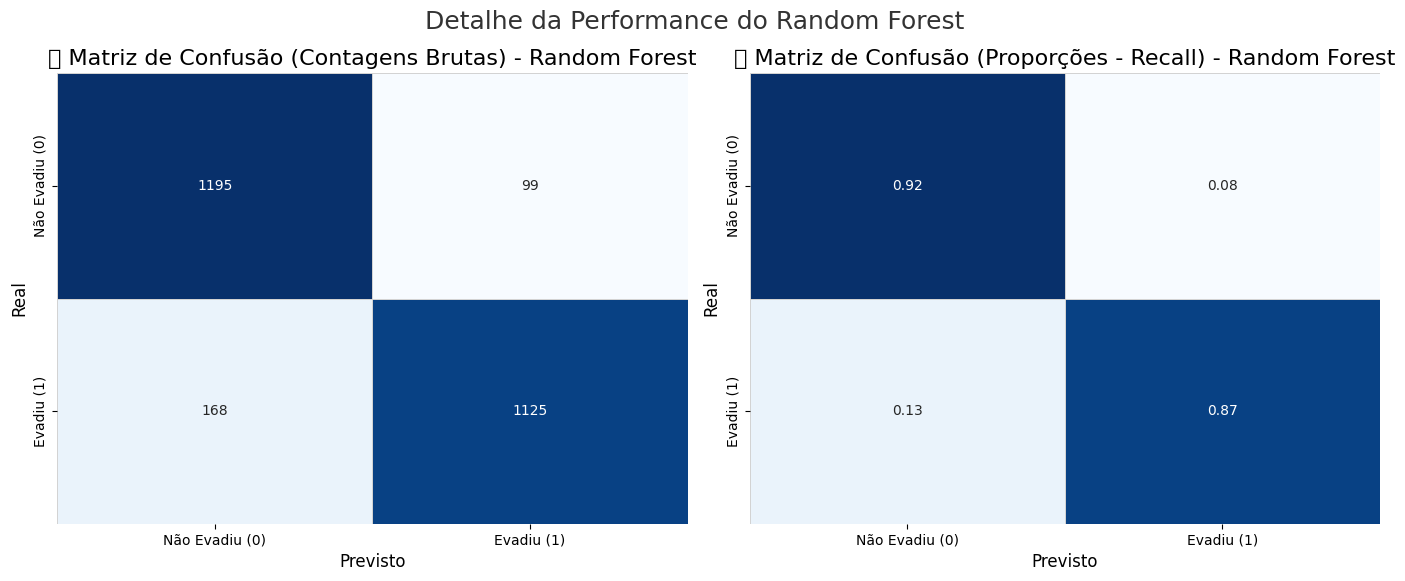


➡️ --- Interpretação Rápida da Matriz de Confusão do Random Forest ---

📚 A matriz acima detalha os acertos e erros do modelo Random Forest:
  - **Verdadeiros Negativos (TN)**: O modelo corretamente previu 1195 clientes que NÃO evadiriam (superior esquerdo).
  - **Falsos Positivos (FP)**: O modelo previu erroneamente 99 clientes como evasores, mas eles NÃO evadiram (superior direito).
  - **Falsos Negativos (FN)**: O modelo previu erroneamente 168 clientes como NÃO evasores, mas eles EVADIRAM (inferior esquerdo). Este é geralmente o erro mais custoso em churn.
  - **Verdadeiros Positivos (TP)**: O modelo corretamente previu 1125 clientes que EVADIRIAM (inferior direito).

📚 A matriz normalizada (à direita) mostra as proporções, o que é crucial para entender as taxas de recall:
  - **Recall (Não Evadiu)**: O modelo identificou corretamente 92.35% dos clientes que realmente NÃO evadiram.
  - **Recall (Evadiu)**: O modelo identificou corretamente 87.01% dos clientes que realmente EVADIRA

In [56]:
cm_normalized = random_forest_confusion_matrix.astype('float') / random_forest_confusion_matrix.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matriz de Confusão Bruta
sns.heatmap(random_forest_confusion_matrix, annot=True, fmt='d', cmap='Blues', # Mantendo cmap='Blues'
            xticklabels=class_names,
            yticklabels=class_names, ax=axes[0], cbar=False, linewidths=.5, linecolor='lightgray')
axes[0].set_title('🔢 Matriz de Confusão (Contagens Brutas) - Random Forest', fontsize=16)
axes[0].set_xlabel('Previsto', fontsize=12)
axes[0].set_ylabel('Real', fontsize=12)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Matriz de Confusão Normalizada (proporções)
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', # Mantendo cmap='Blues'
            xticklabels=class_names,
            yticklabels=class_names, ax=axes[1], cbar=False, linewidths=.5, linecolor='lightgray')
axes[1].set_title('🎯 Matriz de Confusão (Proporções - Recall) - Random Forest', fontsize=16)
axes[1].set_xlabel('Previsto', fontsize=12)
axes[1].set_ylabel('Real', fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Detalhe da Performance do Random Forest', fontsize=18, y=0.99, color='#333')
plt.show()

print("\n➡️ --- Interpretação Rápida da Matriz de Confusão do Random Forest ---")
print()
print("📚 A matriz acima detalha os acertos e erros do modelo Random Forest:")
print(f"  - **Verdadeiros Negativos (TN)**: O modelo corretamente previu {random_forest_confusion_matrix[0,0]} clientes que NÃO evadiriam (superior esquerdo).")
print(f"  - **Falsos Positivos (FP)**: O modelo previu erroneamente {random_forest_confusion_matrix[0,1]} clientes como evasores, mas eles NÃO evadiram (superior direito).")
print(f"  - **Falsos Negativos (FN)**: O modelo previu erroneamente {random_forest_confusion_matrix[1,0]} clientes como NÃO evasores, mas eles EVADIRAM (inferior esquerdo). Este é geralmente o erro mais custoso em churn.")
print(f"  - **Verdadeiros Positivos (TP)**: O modelo corretamente previu {random_forest_confusion_matrix[1,1]} clientes que EVADIRIAM (inferior direito).")
print("\n📚 A matriz normalizada (à direita) mostra as proporções, o que é crucial para entender as taxas de recall:")
print(f"  - **Recall (Não Evadiu)**: O modelo identificou corretamente {cm_normalized[0,0]:.2%} dos clientes que realmente NÃO evadiram.")
print(f"  - **Recall (Evadiu)**: O modelo identificou corretamente {cm_normalized[1,1]:.2%} dos clientes que realmente EVADIRAM. Este é o mais importante para identificar churn.")

> Objetivo:

>> Fornecer uma visão detalhada dos acertos e erros do modelo, tanto em termos de volume quanto de proporção.

>> Duas matrizes lado a lado. A primeira mostra as contagens brutas de Verdadeiros Positivos/Negativos e Falsos Positivos/Negativos. A segunda normaliza esses valores (por linha, representando o Recall), o que é essencial para entender as taxas de erro e acerto em proporção ao que deveria ter sido previsto.

> Considerações:

> A avaliação dos modelos foi realizada possibilitando a analise do desempenho de cada um:

>> **1. Regressão Logística:**

>> Acurácia: 0.84

>> Precisão: 0.84

>> Recall: 0.84

>> F1-score: 0.84

>> ROC AUC: 0.90

>> Matriz de Confusão: <br>
>> Mostra um bom equilíbrio entre Verdadeiros Positivos (clientes que evadiram e foram previstos corretamente) e Verdadeiros Negativos (clientes que não evadiram e foram previstos corretamente).

>> Relatório de Classificação: <br>
>> Confirma as métricas balanceadas para ambas as classes.

>> Importância das Variáveis (Coeficientes): <br>
>> As variáveis com maior coeficiente (positivo) para churn incluem internet.InternetService_Fiber optic, account.<br>
>> Contract_Month-to-month, account.PaperlessBilling_Yes, e account.PaymentMethod_Electronic check. Variáveis com maior coeficiente (negativo) para churn (ou seja, que indicam menor churn) incluem customer.tenure, account.Contract_Two year, e HasPremiumSecurity_True. Isso é consistente com as análises da EDA.


>>** 2. Árvore de Decisão:**

>> Acurácia: 0.79

>> Precisão: 0.79

>> Recall: 0.81

>> F1-score: 0.80

>> ROC AUC: 0.79

>> Matriz de Confusão: <br>
>> Apresenta um desempenho ligeiramente inferior à Regressão Logística, com mais erros de classificação.
>> Relatório de Classificação: <br>
>> Métricas um pouco mais baixas, especialmente para precisão.

>> Importância das Variáveis: <br>
>> As features mais importantes para a Árvore de Decisão são customer.tenure, account.Charges.Monthly, account.Contract_Month-to-month e internet.InternetService_Fiber optic.


>> **3. Random Forest:**

>> Acurácia: 0.85

>> Precisão: 0.84

>> Recall: 0.87

>> F1-score: 0.85

>> ROC AUC: 0.92

>> Matriz de Confusão: <br>
>> Demonstra o melhor desempenho geral entre os três modelos, com um bom equilíbrio de previsões corretas.

>> Relatório de Classificação: <br>
>> As métricas de F1-score são as mais altas para ambas as classes.

>> Importância das Variáveis: <br>
>> Consistentemente com a Árvore de Decisão, customer.tenure, account.Charges.Monthly, account.Contract_Month-to-month e internet.InternetService_Fiber optic são as variáveis mais importantes.

>> Comparativo e Conclusões Preliminares: <br>
>> O Random Forest obteve o melhor desempenho geral, especialmente em termos de F1-score e ROC AUC, que são métricas importantes para datasets balanceados e problemas de classificação onde prever ambas as classes é crucial. Isso é esperado, pois Random Forest é um modelo de ensemble robusto.

>> A Regressão Logística também apresentou um desempenho sólido, com um ROC AUC de 0.90, demonstrando sua capacidade mesmo sendo um modelo linear. Além disso, seus coeficientes fornecem uma interpretabilidade direta sobre a direção e magnitude do impacto de cada feature no churn.

>> A Árvore de Decisão foi o modelo com o menor desempenho entre os três, o que é comum para modelos únicos de árvore comparados a ensembles.

>> A importância das variáveis revelada pelos modelos (especialmente customer.tenure, account.Charges.Monthly, account.Contract_Month-to-month, internet.InternetService_Fiber optic) é consistente com os insights obtidos na Análise Exploratória de Dados.



### ============================================

## 📚 13. Conclusão Estratégica e Próximos Passos

> Objetivo:

>> Sintetiza os principais achados do projeto e propoe recomendações estratégicas para a Telecom X, além de sugerir direções futuras para a .....

>> Esta seção é a ponte entre a análise de dados e a ação de negócios. Traduzimos os resultados técnicos em insights acionáveis e planejamos como continuar a melhorar o modelo e sua aplicação.


In [39]:
print("## Conclusão Estratégica e Próximos Passos")

print("\n### Principais Fatores que Influenciam a Evasão (Churn):")
print("\nCom base na Análise Exploratória de Dados (EDA) e na Interpretação da Importância das Variáveis dos Modelos, os fatores mais influentes para o churn são:")
print("\n*   **Tempo de Serviço (`customer.tenure`)**: Clientes com menor tempo de serviço são significativamente mais propensos a churnar. Isso é o fator isolado mais importante identificado. A maioria dos churns ocorre nos primeiros meses.")
print("*   **Tipo de Contrato (`account.Contract`)**: Clientes com contratos **Mês a Mês** têm uma probabilidade muito maior de churn (43% de taxa de evasão) em comparação com contratos de 1 ou 2 anos. Contratos de longo prazo são um forte indicador de fidelidade.")
print("*   **Serviço de Internet (`internet.InternetService`)**: Clientes com serviço de **Fibra Ótica** apresentam uma taxa de churn notavelmente alta (cerca de 42%), muito superior aos de DSL (19%) ou sem internet (7.5%). Isso sugere problemas de satisfação ou forte concorrência nesse segmento.")
print("*   **Cobrança Mensal (`account.Charges.Monthly`)**: Clientes com cobranças mensais mais elevadas tendem a ter uma maior propensão ao churn. É importante avaliar se o valor percebido corresponde ao preço pago.")
print("*   **Método de Pagamento (`account.PaymentMethod`)**: O pagamento via **Cheque Eletrônico** está associado à maior taxa de churn (45%), o que pode indicar um perfil de cliente menos engajado ou menos satisfeito.")
print("*   **Serviços de Segurança Premium (`HasPremiumSecurity`)**: Clientes que assinam serviços de segurança e suporte técnico premium tendem a churnar muito menos (9%), o que demonstra o valor percebido desses serviços na fidelização.")
print("*   **Idoso (`customer.SeniorCitizen`)**: Clientes seniores (`1`) possuem uma taxa de churn percentualmente maior, indicando que este grupo pode requerer atenção diferenciada.")
print("*   **Fatura Sem Papel (`account.PaperlessBilling`)**: Clientes que optam pela fatura sem papel são mais propensos ao churn. Embora possa parecer contra-intuitivo, isso pode estar associado a um perfil mais digital e propenso a comparar ofertas online.")

print("\n### Recomendações Estratégicas para a Telecom X:")
print("\n1.  **Foco nos Primeiros Meses de Contrato (Onboarding)**: Implementar um programa de onboarding robusto para novos clientes, especialmente nos primeiros 6 meses, com acompanhamento proativo e oferta de suporte diferenciado. Este é o período mais crítico para a retenção.")
print("2.  **Incentivo a Contratos de Longo Prazo**: Oferecer benefícios claros (descontos, serviços adicionais) para clientes que optarem por contratos de 1 ou 2 anos. Campanhas de migração de clientes mês a mês para planos de fidelidade podem ser muito eficazes.")
print("3.  **Avaliação e Melhoria do Serviço de Fibra Ótica**: Realizar uma análise aprofundada das causas da alta taxa de churn em clientes de Fibra Ótica. Isso pode envolver pesquisa de satisfação, avaliação da qualidade do serviço/conexão, ou revisão das ofertas competitivas de mercado. Pode ser necessário um plano de ação específico para este segmento.")
print("4.  **Otimização de Planos e Preços**: Analisar a relação entre `account.Charges.Monthly` e a percepção de valor. Clientes com mensalidades altas podem estar mais sensíveis a custos. Pacotes de serviços mais claros e flexíveis podem ser uma solução.")
print("5.  **Análise do Perfil de Pagamento por Cheque Eletrônico**: Investigar por que clientes que pagam com cheque eletrônico churnam mais. Pode haver uma correlação com menor engajamento ou falta de familiaridade com outras formas de interação digital.")
print("6.  **Promoção de Serviços Premium**: Destacar o valor dos serviços de segurança e suporte técnico (`OnlineSecurity`, `TechSupport`). Clientes que utilizam esses serviços tendem a ser mais leais, indicando que investir na promoção e qualidade desses adicionais pode ter um bom retorno.")
print("7.  **Atendimento Personalizado para Idosos**: Desenvolver programas de atendimento e suporte específicos para clientes seniores, considerando suas necessidades e preferências.")
print("8.  **Revisão da Experiência Digital (Fatura Sem Papel)**: Embora seja um benefício ambiental, a alta taxa de churn para usuários de fatura sem papel sugere que o contato digital pode estar associado a menor fidelidade. Pode ser necessário balancear a comunicação digital com outras formas de engajamento.")

print("\n### O Modelo Preditor (Random Forest):")
print("\nO modelo **Random Forest** demonstrou ser o mais eficaz para prever a evasão, atingindo uma Acurácia de 0.85, F1-score de 0.85 e ROC AUC de 0.92. Sua capacidade de identificar padrões complexos e as importantes features de churn (tenure, tipo de contrato, serviço de internet) o tornam uma ferramenta poderosa.")
print("\nEste modelo pode ser usado para:")
print("*   **Identificar clientes em risco**: Atribuir uma pontuação de risco de churn a cada cliente, permitindo ações proativas.")
print("*   **Otimizar campanhas de retenção**: Direcionar esforços e ofertas personalizadas para clientes com alta probabilidade de evasão.")
print("*   **Monitorar tendências**: Acompanhar as features mais importantes para entender as mudanças no comportamento dos clientes.")

print("\n### Próximos Passos:")
print("\n1.  **Otimização de Hiperparâmetros**: Explorar técnicas como GridSearchCV ou RandomizedSearchCV para otimizar os hiperparâmetros do modelo Random Forest (e de outros, se necessário) e buscar um desempenho ainda melhor.")
print("2.  **Validação Cruzada (Cross-Validation)**: Realizar validação cruzada para garantir a robustez do modelo e sua capacidade de generalização em diferentes subconjuntos de dados.")
print("3.  **Análise de Erros**: Aprofundar a análise dos Falsos Positivos e Falsos Negativos da matriz de confusão para entender os tipos de erro do modelo e suas implicações de negócio. Por exemplo, pode ser mais custoso perder um cliente de alto valor (Falso Negativo) do que oferecer um benefício desnecessário a um cliente que não iria churnar (Falso Positivo).")
print("4.  **Implantação (Deployment)**: Desenvolver uma solução para integrar o modelo em um ambiente de produção, permitindo que as previsões sejam usadas em tempo real ou quase real.")
print("5.  **Monitoramento Contínuo**: Implementar um sistema para monitorar o desempenho do modelo ao longo do tempo, pois o comportamento do cliente e as condições de mercado podem mudar, exigindo re-treinamento ou ajuste do modelo.")
print("6.  **Análise de Custo-Benefício**: Quantificar o impacto financeiro das ações de retenção baseadas nas previsões do modelo.")
print("7.  **Exploração de Outros Modelos**: Considerar modelos mais avançados ou específicos, como LightGBM, XGBoost, ou redes neurais, se o desempenho e os requisitos do negócio justificarem a complexidade adicional.")

print("\nEste projeto fornece uma base sólida para que a Telecom X possa iniciar suas estratégias de prevenção de churn de forma data-driven e eficaz.")

## Conclusão Estratégica e Próximos Passos

### Principais Fatores que Influenciam a Evasão (Churn):

Com base na Análise Exploratória de Dados (EDA) e na Interpretação da Importância das Variáveis dos Modelos, os fatores mais influentes para o churn são:

*   **Tempo de Serviço (`customer.tenure`)**: Clientes com menor tempo de serviço são significativamente mais propensos a churnar. Isso é o fator isolado mais importante identificado. A maioria dos churns ocorre nos primeiros meses.
*   **Tipo de Contrato (`account.Contract`)**: Clientes com contratos **Mês a Mês** têm uma probabilidade muito maior de churn (43% de taxa de evasão) em comparação com contratos de 1 ou 2 anos. Contratos de longo prazo são um forte indicador de fidelidade.
*   **Serviço de Internet (`internet.InternetService`)**: Clientes com serviço de **Fibra Ótica** apresentam uma taxa de churn notavelmente alta (cerca de 42%), muito superior aos de DSL (19%) ou sem internet (7.5%). Isso sugere problemas de satisfação

### ============================================

## 📚 14. Considerações finais:

>> Principais Fatores de Churn:

>>> Com base na análise exploratória e na importância das variáveis dos modelos, foram identificados os fatores mais influentes para a evasão:
>>> Tempo de Serviço, Tipo de Contrato (Mês a Mês), Serviço de Internet (Fibra Ótica), Cobrança Mensal, Método de Pagamento (Cheque Eletrônico), Serviços de Segurança Premium, Clientes Idosos e Fatura Sem Papel.

>> Recomendações Estratégicas: <br>

>>> Para cada fator-chave, foram propostas recomendações acionáveis, como focar no onboarding de novos clientes, incentivar contratos de longo prazo, investigar problemas no serviço de fibra ótica, otimizar planos/preços, e entender o perfil de clientes que usam cheque eletrônico.

>> O Modelo Preditor: <br>
>>> O modelo Random Forest foi destacado como o de melhor desempenho (Acurácia: 0.85, F1-score: 0.85, ROC AUC: 0.92), com sua capacidade de identificar clientes em risco e otimizar campanhas de retenção.

>> Próximos Passos: <br>
>>> Foram delineadas as próximas etapas para aprimorar o modelo e sua aplicação prática, incluindo otimização de hiperparâmetros, validação cruzada, análise de erros, implantação, monitoramento contínuo e análise de custo-benefício.